In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet
from datetime import datetime
from time import time

In [2]:
#read in csv for
all_bdrm = pd.read_csv("./Resources/housing_prices_data.csv")
all_bdrm.dropna(inplace=True)
all_bdrm.head(54)

,RegionID,Neighborhood,State,City,Metro,County,2019-01-31,2019-02-28,2019-03-31,2019-04-30,...,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,BedroomCount,Location
0,118208,South Los Angeles,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,331301.0,328698.0,325906.0,323279.0,...,486580.0,486336.0,486796.0,486585.0,487578.0,486809.0,489862.0,489152.0,1,"South Los Angeles, Los Angeles"
1,268496,Southeast Los Angeles,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,300152.0,297244.0,293939.0,290796.0,...,413743.0,416449.0,419431.0,420848.0,422551.0,422515.0,427628.0,430679.0,1,"Southeast Los Angeles, Los Angeles"
2,273565,East San Jose,CA,San Jose,"San Jose-Sunnyvale-Santa Clara, CA",Santa Clara County,418566.0,415034.0,410266.0,406200.0,...,465629.0,463605.0,460273.0,456309.0,452782.0,449427.0,451437.0,454010.0,1,"East San Jose, San Jose"
3,273088,Bullard,CA,Fresno,"Fresno, CA",Fresno County,93733.0,94532.0,94801.0,94473.0,...,156623.0,158448.0,159079.0,159166.0,158239.0,157523.0,162523.0,167592.0,1,"Bullard, Fresno"
4,276652,West San Jose,CA,San Jose,"San Jose-Sunnyvale-Santa Clara, CA",Santa Clara County,538711.0,530457.0,519145.0,508979.0,...,550898.0,546854.0,542083.0,538433.0,536506.0,535151.0,551396.0,573673.0,1,"West San Jose, San Jose"
5,276215,Blossom Valley,CA,San Jose,"San Jose-Sunnyvale-Santa Clara, CA",Santa Clara County,462816.0,458452.0,451249.0,445176.0,...,506927.0,504596.0,500951.0,496958.0,494183.0,492298.0,494323.0,495488.0,1,"Blossom Valley, San Jose"
6,276476,North Long Beach,CA,Long Beach,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,266728.0,265556.0,263175.0,260926.0,...,402911.0,404267.0,405088.0,405569.0,406738.0,406488.0,410371.0,411345.0,1,"North Long Beach, Long Beach"
7,118987,Willow Glen,CA,San Jose,"San Jose-Sunnyvale-Santa Clara, CA",Santa Clara County,581363.0,573486.0,563685.0,553849.0,...,644741.0,637962.0,630263.0,624112.0,621834.0,620207.0,631158.0,639936.0,1,"Willow Glen, San Jose"
8,273480,Downtown,CA,San Jose,"San Jose-Sunnyvale-Santa Clara, CA",Santa Clara County,648736.0,643617.0,635750.0,626482.0,...,677957.0,671321.0,663768.0,656509.0,651720.0,648991.0,651081.0,653072.0,1,"Downtown, San Jose"
9,113886,Boyle Heights,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,376977.0,372352.0,365782.0,360569.0,...,466802.0,467986.0,469767.0,470172.0,470898.0,470543.0,476385.0,478590.0,1,"Boyle Heights, Los Angeles"


In [159]:
#chose the first row in as a test 
grouped_df = all_bdrm.loc[all_bdrm['City']=="Los Angeles"]
grouped_df = grouped_df.loc[grouped_df['BedroomCount']==3]
grouped_df

,RegionID,Neighborhood,State,City,Metro,County,2019-01-31,2019-02-28,2019-03-31,2019-04-30,...,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,BedroomCount,Location
1666,118208,South Los Angeles,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,506642.0,502524.0,497331.0,493370.0,...,677691.0,678758.0,679208.0,677960.0,677351.0,674928.0,667856.0,658327.0,3,"South Los Angeles, Los Angeles"
1667,268496,Southeast Los Angeles,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,425679.0,422895.0,418987.0,416306.0,...,576533.0,579171.0,580886.0,580609.0,580315.0,578471.0,573768.0,566632.0,3,"Southeast Los Angeles, Los Angeles"
1668,32059,Hollywood,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,1049157.0,1033921.0,1014035.0,997012.0,...,1269591.0,1267684.0,1259481.0,1249495.0,1245442.0,1241973.0,1224602.0,1199052.0,3,"Hollywood, Los Angeles"
1672,46795,North Hollywood,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,618702.0,610972.0,601928.0,595235.0,...,848822.0,847264.0,844247.0,840153.0,837289.0,833486.0,823266.0,809116.0,3,"North Hollywood, Los Angeles"
1678,41466,Van Nuys,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,614327.0,607417.0,598581.0,591995.0,...,849801.0,849356.0,848271.0,846350.0,845657.0,842136.0,827972.0,809393.0,3,"Van Nuys, Los Angeles"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2482,33952,Shadow Hills,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,835151.0,828216.0,819205.0,811623.0,...,1136274.0,1135904.0,1134361.0,1131726.0,1131064.0,1127932.0,1114463.0,1093305.0,3,"Shadow Hills, Los Angeles"
2789,403194,South Carthay,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,1763548.0,1737451.0,1705122.0,1678196.0,...,2068938.0,2074923.0,2066741.0,2049098.0,2041508.0,2038559.0,2020110.0,1986785.0,3,"South Carthay, Los Angeles"
2795,417433,Hermon,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,799759.0,788258.0,774307.0,764328.0,...,1076159.0,1078852.0,1076859.0,1072908.0,1070459.0,1067153.0,1046506.0,1017395.0,3,"Hermon, Los Angeles"
2934,25449,La Tuna Canyon,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,817861.0,812521.0,805034.0,798099.0,...,1123630.0,1123729.0,1121636.0,1116260.0,1113394.0,1109217.0,1094771.0,1073069.0,3,"La Tuna Canyon, Los Angeles"


In [160]:
#transposed data 
grouped_df = grouped_df.transpose()


In [162]:
#reset the index while moving the current index into a new column
grouped_df.reset_index(inplace=True)

In [46]:
#change column name to the neighborhood row 1
neighborhood = grouped_df.iloc[1]
#rename the column
grouped_df.rename(columns=neighborhood, inplace=True)
grouped_df

,Neighborhood,South Los Angeles,Southeast Los Angeles,Hollywood,North Hollywood,Van Nuys,Mid City,Northridge,Boyle Heights,Woodland Hills,...,Bel Air,Playa Vista,Elysian Valley,University Hills,Century City,Shadow Hills,South Carthay,Hermon,La Tuna Canyon,Beverly Glen
0,RegionID,118208,268496,32059,46795,41466,274514,33183,113886,48570,...,113688,13327,403191,403190,114246,33952,403194,417433,25449,785933
1,Neighborhood,South Los Angeles,Southeast Los Angeles,Hollywood,North Hollywood,Van Nuys,Mid City,Northridge,Boyle Heights,Woodland Hills,...,Bel Air,Playa Vista,Elysian Valley,University Hills,Century City,Shadow Hills,South Carthay,Hermon,La Tuna Canyon,Beverly Glen
2,State,CA,CA,CA,CA,CA,CA,CA,CA,CA,...,CA,CA,CA,CA,CA,CA,CA,CA,CA,CA
3,City,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles,...,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles
4,Metro,"Los Angeles-Long Beach-Anaheim, CA","Los Angeles-Long Beach-Anaheim, CA","Los Angeles-Long Beach-Anaheim, CA","Los Angeles-Long Beach-Anaheim, CA","Los Angeles-Long Beach-Anaheim, CA","Los Angeles-Long Beach-Anaheim, CA","Los Angeles-Long Beach-Anaheim, CA","Los Angeles-Long Beach-Anaheim, CA","Los Angeles-Long Beach-Anaheim, CA",...,"Los Angeles-Long Beach-Anaheim, CA","Los Angeles-Long Beach-Anaheim, CA","Los Angeles-Long Beach-Anaheim, CA","Los Angeles-Long Beach-Anaheim, CA","Los Angeles-Long Beach-Anaheim, CA","Los Angeles-Long Beach-Anaheim, CA","Los Angeles-Long Beach-Anaheim, CA","Los Angeles-Long Beach-Anaheim, CA","Los Angeles-Long Beach-Anaheim, CA","Los Angeles-Long Beach-Anaheim, CA"
5,County,Los Angeles County,Los Angeles County,Los Angeles County,Los Angeles County,Los Angeles County,Los Angeles County,Los Angeles County,Los Angeles County,Los Angeles County,...,Los Angeles County,Los Angeles County,Los Angeles County,Los Angeles County,Los Angeles County,Los Angeles County,Los Angeles County,Los Angeles County,Los Angeles County,Los Angeles County
6,2019-01-31,506642.0,425679.0,1049157.0,618702.0,614327.0,1052393.0,646321.0,480199.0,752966.0,...,2090981.0,1416826.0,736263.0,602941.0,1616164.0,835151.0,1763548.0,799759.0,817861.0,1371083.0
7,2019-02-28,502524.0,422895.0,1033921.0,610972.0,607417.0,1037239.0,639780.0,475646.0,745193.0,...,2060588.0,1414969.0,724949.0,593871.0,1594537.0,828216.0,1737451.0,788258.0,812521.0,1352654.0
8,2019-03-31,497331.0,418987.0,1014035.0,601928.0,598581.0,1019476.0,631233.0,470246.0,736142.0,...,2010781.0,1411302.0,711223.0,582280.0,1562239.0,819205.0,1705122.0,774307.0,805034.0,1325372.0
9,2019-04-30,493370.0,416306.0,997012.0,595235.0,591995.0,1005516.0,625164.0,466559.0,730145.0,...,1973993.0,1402774.0,700763.0,573834.0,1534335.0,811623.0,1678196.0,764328.0,798099.0,1305366.0


In [59]:
#dropping string columns 
grouped_df = grouped_df.drop(grouped_df.index[0:6])
grouped_df

,Neighborhood,South Los Angeles,Southeast Los Angeles,Hollywood,North Hollywood,Van Nuys,Mid City,Northridge,Boyle Heights,Woodland Hills,...,Bel Air,Playa Vista,Elysian Valley,University Hills,Century City,Shadow Hills,South Carthay,Hermon,La Tuna Canyon,Beverly Glen
6,2019-01-31,506642.0,425679.0,1049157.0,618702.0,614327.0,1052393.0,646321.0,480199.0,752966.0,...,2090981.0,1416826.0,736263.0,602941.0,1616164.0,835151.0,1763548.0,799759.0,817861.0,1371083.0
7,2019-02-28,502524.0,422895.0,1033921.0,610972.0,607417.0,1037239.0,639780.0,475646.0,745193.0,...,2060588.0,1414969.0,724949.0,593871.0,1594537.0,828216.0,1737451.0,788258.0,812521.0,1352654.0
8,2019-03-31,497331.0,418987.0,1014035.0,601928.0,598581.0,1019476.0,631233.0,470246.0,736142.0,...,2010781.0,1411302.0,711223.0,582280.0,1562239.0,819205.0,1705122.0,774307.0,805034.0,1325372.0
9,2019-04-30,493370.0,416306.0,997012.0,595235.0,591995.0,1005516.0,625164.0,466559.0,730145.0,...,1973993.0,1402774.0,700763.0,573834.0,1534335.0,811623.0,1678196.0,764328.0,798099.0,1305366.0
10,2019-05-31,490663.0,414891.0,985950.0,591315.0,587841.0,998154.0,621725.0,464818.0,727364.0,...,1948349.0,1391431.0,695888.0,570394.0,1513286.0,805655.0,1660898.0,760371.0,791811.0,1293861.0
11,2019-06-30,488695.0,413916.0,979675.0,588465.0,585687.0,993165.0,620015.0,464327.0,726288.0,...,1933075.0,1378671.0,694420.0,568850.0,1501061.0,800464.0,1651865.0,759855.0,785429.0,1290163.0
12,2019-07-31,490276.0,415614.0,981687.0,589490.0,587858.0,996528.0,621573.0,466293.0,728457.0,...,1930260.0,1369210.0,699746.0,571962.0,1500854.0,799342.0,1655308.0,764777.0,784890.0,1294664.0
13,2019-08-31,496185.0,420681.0,990860.0,595187.0,594251.0,1007082.0,627133.0,471113.0,734003.0,...,1944950.0,1367578.0,709972.0,578233.0,1516959.0,804260.0,1669693.0,773163.0,790898.0,1308968.0
14,2019-09-30,504832.0,427909.0,1005720.0,604523.0,603319.0,1023795.0,635021.0,477760.0,742102.0,...,1973632.0,1374676.0,723448.0,587138.0,1538275.0,814757.0,1691773.0,783995.0,802186.0,1328877.0
15,2019-10-31,513226.0,434775.0,1021409.0,614158.0,612866.0,1039454.0,643485.0,484675.0,750261.0,...,2004177.0,1384760.0,736417.0,596979.0,1559731.0,826840.0,1711706.0,794156.0,814160.0,1345995.0


In [80]:
#dropping bedroom count and reset columns
grouped_df = grouped_df.drop(grouped_df.index[50:52])
grouped_df = grouped_df.reset_index(drop=True)
grouped_df.tail()

,ds,South Los Angeles,Southeast Los Angeles,Hollywood,North Hollywood,Van Nuys,Mid City,Northridge,Boyle Heights,Woodland Hills,...,Bel Air,Playa Vista,Elysian Valley,University Hills,Century City,Shadow Hills,South Carthay,Hermon,La Tuna Canyon,Beverly Glen
45,2022-10-31,677960.0,580609.0,1249495.0,840153.0,846350.0,1316074.0,888851.0,645797.0,1074095.0,...,2799981.0,1801784.0,942738.0,803321.0,1997439.0,1131726.0,2049098.0,1072908.0,1116260.0,1763748.0
46,2022-11-30,677351.0,580315.0,1245442.0,837289.0,845657.0,1311609.0,885620.0,646438.0,1074092.0,...,2791602.0,1801172.0,941436.0,803770.0,1993337.0,1131064.0,2041508.0,1070459.0,1113394.0,1771572.0
47,2022-12-31,674928.0,578471.0,1241973.0,833486.0,842136.0,1307682.0,880752.0,645018.0,1072565.0,...,2789166.0,1801740.0,939285.0,802846.0,1993193.0,1127932.0,2038559.0,1067153.0,1109217.0,1778746.0
48,2023-01-31,667856.0,573768.0,1224602.0,823266.0,827972.0,1292686.0,869527.0,640439.0,1063514.0,...,2778769.0,1804037.0,929640.0,792947.0,1970259.0,1114463.0,2020110.0,1046506.0,1094771.0,1766566.0
49,2023-02-28,658327.0,566632.0,1199052.0,809116.0,809393.0,1271165.0,855065.0,632349.0,1048335.0,...,2748428.0,1805707.0,910384.0,776288.0,1934174.0,1093305.0,1986785.0,1017395.0,1073069.0,1732400.0


In [81]:
#renamed the neighborhood column to ds needed for Prophet
grouped_df.rename(columns={'Neighborhood':'ds'}, inplace=True)

In [82]:
#melt the dataframe by keeping the dates as the identifying variable 
#and repeat the rows based on columns
melt_df = pd.melt(grouped_df, id_vars='ds', value_vars=['South Los Angeles', 'Southeast Los Angeles',
       'Hollywood', 'North Hollywood', 'Van Nuys', 'Mid City', 'Northridge',
       'Boyle Heights', 'Woodland Hills', 'Sylmar', 'San Pedro', 'Pacoima',
       'Koreatown', 'Sherman Oaks', 'Reseda', 'Westlake', 'Panorama City',
       'North Hills', 'Valley Glen', 'Central City', 'Westwood', 'Sun Valley',
       'Canoga Park', 'Wilmington', 'Granada Hills', 'Highland Park',
       'Winnetka', 'Lake Balboa', 'Encino', 'Mid City West', 'El Sereno',
       'Downtown', 'Harbor Gateway', 'Palms', 'Mar Vista', 'Watts', 'Arleta',
       'Chatsworth', 'West Hills', 'Mid Wilshire', 'Studio City',
       'Silver Lake', 'Tarzana', 'Westchester', 'Park Mesa Heights', 'Del Rey',
       'Hollywood Hills', 'Sawtelle', 'Brentwood', 'Venice', 'Lincoln Heights',
       'Jefferson Park', 'Eagle Rock', 'Harvard Heights', 'University Park',
       'Los Feliz', 'Valley Village', 'Tujunga', 'Harbor City',
       'Rampart Village', 'West Adams', 'Echo Park', 'Glassell Park',
       'Porter Ranch', 'Pacific Palisades', 'Mission Hills', 'Pico-Robertson',
       'Adams-Normandie', 'Mount Washington', 'Pico-Union', 'Playa Del Rey',
       'Sunland', 'West Los Angeles', 'Cheviot Hills', 'Arlington Heights',
       'Lakeview Terrace', 'Atwater Village', 'Beverly Crest', 'Cypress Park',
       'Leimert Park', 'Crestview', 'Toluca Lake', 'Montecito Heights',
       'Beverlywood', 'Crenshaw', 'Bel Air', 'Playa Vista', 'Elysian Valley',
       'University Hills', 'Century City', 'Shadow Hills', 'South Carthay',
       'Hermon', 'La Tuna Canyon', 'Beverly Glen'])
melt_df.columns = ['ds','neighborhood','y']
melt_df.head()

,ds,neighborhood,y
0,2019-01-31,South Los Angeles,506642.0
1,2019-02-28,South Los Angeles,502524.0
2,2019-03-31,South Los Angeles,497331.0
3,2019-04-30,South Los Angeles,493370.0
4,2019-05-31,South Los Angeles,490663.0


In [83]:
#check the tail to see if there aren't any strings
melt_df.tail()

,ds,neighborhood,y
4745,2022-10-31,Beverly Glen,1763748.0
4746,2022-11-30,Beverly Glen,1771572.0
4747,2022-12-31,Beverly Glen,1778746.0
4748,2023-01-31,Beverly Glen,1766566.0
4749,2023-02-28,Beverly Glen,1732400.0


In [84]:
melt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ds            4750 non-null   object
 1   neighborhood  4750 non-null   object
 2   y             4750 non-null   object
dtypes: object(3)
memory usage: 111.5+ KB


In [87]:
Check
grouped_by_neighborhood = melt_df.groupby('neighborhood')
grouped_by_neighborhood.groups.keys()

dict_keys(['Adams-Normandie', 'Arleta', 'Arlington Heights', 'Atwater Village', 'Bel Air', 'Beverly Crest', 'Beverly Glen', 'Beverlywood', 'Boyle Heights', 'Brentwood', 'Canoga Park', 'Central City', 'Century City', 'Chatsworth', 'Cheviot Hills', 'Crenshaw', 'Crestview', 'Cypress Park', 'Del Rey', 'Downtown', 'Eagle Rock', 'Echo Park', 'El Sereno', 'Elysian Valley', 'Encino', 'Glassell Park', 'Granada Hills', 'Harbor City', 'Harbor Gateway', 'Harvard Heights', 'Hermon', 'Highland Park', 'Hollywood', 'Hollywood Hills', 'Jefferson Park', 'Koreatown', 'La Tuna Canyon', 'Lake Balboa', 'Lakeview Terrace', 'Leimert Park', 'Lincoln Heights', 'Los Feliz', 'Mar Vista', 'Mid City', 'Mid City West', 'Mid Wilshire', 'Mission Hills', 'Montecito Heights', 'Mount Washington', 'North Hills', 'North Hollywood', 'Northridge', 'Pacific Palisades', 'Pacoima', 'Palms', 'Panorama City', 'Park Mesa Heights', 'Pico-Robertson', 'Pico-Union', 'Playa Del Rey', 'Playa Vista', 'Porter Ranch', 'Rampart Village', 'R

In [165]:
grouped_by_neighborhood

In [141]:
def train_and_forecast(group):
  # Initiate the model
  model = Prophet()
  
  # Fit the model
  model.fit(group)
  # Make predictions
  future = model.make_future_dataframe(periods=3,)
  forecast = model.predict(future)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
  forecast['neighborhood'] = group['neighborhood'].iloc[0]
  
  # Return the forecasted results
  return forecast[['ds', 'neighborhood', 'yhat', 'yhat_upper', 'yhat_lower']]


In [137]:
forecast.head()

,ds,yhat,yhat_lower,yhat_upper,neighborhood
0,2019-01-31,740971.184289,727372.509121,754433.922504,Woodland Hills
1,2019-02-28,727237.938390,714393.795869,740646.134920,Woodland Hills
2,2019-03-31,739193.691734,726235.964597,751945.139824,Woodland Hills
3,2019-04-30,736280.916477,723310.382321,748958.932856,Woodland Hills
4,2019-05-31,738660.487734,725061.915863,752460.539835,Woodland Hills


In [113]:
model = Prophet()
model

In [114]:
neighborhood_list = ['Adams-Normandie', 'Arleta', 'Arlington Heights', 'Atwater Village', 'Bel Air', 'Beverly Crest', 'Beverly Glen', 'Beverlywood', 'Boyle Heights', 'Brentwood', 'Canoga Park', 'Central City', 'Century City', 'Chatsworth', 'Cheviot Hills', 'Crenshaw', 'Crestview', 'Cypress Park', 'Del Rey', 'Downtown', 'Eagle Rock', 'Echo Park', 'El Sereno', 'Elysian Valley', 'Encino', 'Glassell Park', 'Granada Hills', 'Harbor City', 'Harbor Gateway', 'Harvard Heights', 'Hermon', 'Highland Park', 'Hollywood', 'Hollywood Hills', 'Jefferson Park', 'Koreatown', 'La Tuna Canyon', 'Lake Balboa', 'Lakeview Terrace', 'Leimert Park', 'Lincoln Heights', 'Los Feliz', 'Mar Vista', 'Mid City', 'Mid City West', 'Mid Wilshire', 'Mission Hills', 'Montecito Heights', 'Mount Washington', 'North Hills', 'North Hollywood', 'Northridge', 'Pacific Palisades', 'Pacoima', 'Palms', 'Panorama City', 'Park Mesa Heights', 'Pico-Robertson', 'Pico-Union', 'Playa Del Rey', 'Playa Vista', 'Porter Ranch', 'Rampart Village', 'Reseda', 'San Pedro', 'Sawtelle', 'Shadow Hills', 'Sherman Oaks', 'Silver Lake', 'South Carthay', 'South Los Angeles', 'Southeast Los Angeles', 'Studio City', 'Sun Valley', 'Sunland', 'Sylmar', 'Tarzana', 'Toluca Lake', 'Tujunga', 'University Hills', 'University Park', 'Valley Glen', 'Valley Village', 'Van Nuys', 'Venice', 'Watts', 'West Adams', 'West Hills', 'West Los Angeles', 'Westchester', 'Westlake', 'Westwood', 'Wilmington', 'Winnetka', 'Woodland Hills']

In [115]:
# Start time
start_time = time()
# Create an empty dataframe
for_loop_forecast = pd.DataFrame()
# Loop through each ticker
for hood in neighborhood_list:
  # Get the data for the ticker
  group = grouped_by_neighborhood.get_group(hood)  
  # Make forecast
  forecast = train_and_forecast(group)
  # Add the forecast results to the dataframe
  for_loop_forecast = pd.concat((for_loop_forecast, forecast))
print('The time used for the for-loop forecast is ', time()-start_time)
# Take a look at the data
for_loop_forecast.head()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1373
Iteration  1. Log joint probability =    77.3369. Improved by 137.474.
Iteration  2. Log joint probability =     106.33. Improved by 28.9932.
Iteration  3. Log joint probability =    145.094. Improved by 38.764.
Iteration  4. Log joint probability =    169.863. Improved by 24.7687.
Iteration  5. Log joint probability =    169.919. Improved by 0.0557137.
Iteration  6. Log joint probability =     169.95. Improved by 0.0313651.
Iteration  7. Log joint probability =    170.119. Improved by 0.169153.
Iteration  8. Log joint probability =    170.159. Improved by 0.039666.
Iteration  9. Log joint probability =    170.197. Improved by 0.0384382.
Iteration 10. Log joint probability =    170.257. Improved by 0.0596387.
Iteration 11. Log joint probability =    170.297. Improved by 0.0405678.
Iteration 12. Log joint probability =    170.375. Improved by 0.0777382.
Iteration 13. Log joint probability =    170.492. Improved by 0.116969.
Iteration 14. Log joi

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayza


Initial log joint probability = -60.1373
Iteration  1. Log joint probability =    77.4496. Improved by 137.587.
Iteration  2. Log joint probability =    98.5588. Improved by 21.1092.
Iteration  3. Log joint probability =    148.774. Improved by 50.2152.
Iteration  4. Log joint probability =    166.711. Improved by 17.9366.
Iteration  5. Log joint probability =    166.776. Improved by 0.0649766.
Iteration  6. Log joint probability =    167.143. Improved by 0.367701.
Iteration  7. Log joint probability =     167.16. Improved by 0.0165221.
Iteration  8. Log joint probability =    167.841. Improved by 0.680957.
Iteration  9. Log joint probability =    167.893. Improved by 0.0519511.
Iteration 10. Log joint probability =    168.047. Improved by 0.154022.
Iteration 11. Log joint probability =    169.834. Improved by 1.78709.
Iteration 12. Log joint probability =    170.017. Improved by 0.183067.
Iteration 13. Log joint probability =    170.843. Improved by 0.82592.
Iteration 14. Log joint p

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1527
Iteration  1. Log joint probability =    75.7897. Improved by 135.942.
Iteration  2. Log joint probability =    114.096. Improved by 38.3062.
Iteration  3. Log joint probability =    127.959. Improved by 13.8631.
Iteration  4. Log joint probability =     136.67. Improved by 8.71074.
Iteration  5. Log joint probability =    162.218. Improved by 25.5485.
Iteration  6. Log joint probability =     162.22. Improved by 0.00215075.
Iteration  7. Log joint probability =     162.25. Improved by 0.0293132.
Iteration  8. Log joint probability =    162.301. Improved by 0.0514589.
Iteration  9. Log joint probability =     162.35. Improved by 0.0490356.
Iteration 10. Log joint probability =    162.469. Improved by 0.119203.
Iteration 11. Log joint probability =     162.53. Improved by 0.0609533.
Iteration 12. Log joint probability =    162.698. Improved by 0.167751.
Iteration 13. Log joint probability =    162.987. Improved by 0.288486.
Iteration 14. Log joi

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayza


Initial log joint probability = -60.1471
Iteration  1. Log joint probability =    76.5449. Improved by 136.692.
Iteration  2. Log joint probability =     113.09. Improved by 36.5449.
Iteration  3. Log joint probability =    142.608. Improved by 29.5183.
Iteration  4. Log joint probability =    146.659. Improved by 4.05055.
Iteration  5. Log joint probability =    148.336. Improved by 1.67763.
Iteration  6. Log joint probability =    148.339. Improved by 0.00260235.
Iteration  7. Log joint probability =    148.538. Improved by 0.198769.
Iteration  8. Log joint probability =     148.65. Improved by 0.112341.
Iteration  9. Log joint probability =    148.725. Improved by 0.0749266.
Iteration 10. Log joint probability =    148.877. Improved by 0.152222.
Iteration 11. Log joint probability =    149.151. Improved by 0.273281.
Iteration 12. Log joint probability =    149.349. Improved by 0.198139.
Iteration 13. Log joint probability =    149.616. Improved by 0.267232.
Iteration 14. Log joint 

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1954
Iteration  1. Log joint probability =    70.7773. Improved by 130.973.
Iteration  2. Log joint probability =    92.0055. Improved by 21.2282.
Iteration  3. Log joint probability =    122.882. Improved by 30.8765.
Iteration  4. Log joint probability =     122.92. Improved by 0.0382216.
Iteration  5. Log joint probability =     122.93. Improved by 0.00986227.
Iteration  6. Log joint probability =    123.006. Improved by 0.0756916.
Iteration  7. Log joint probability =    123.016. Improved by 0.00988327.
Iteration  8. Log joint probability =    123.052. Improved by 0.0365014.
Iteration  9. Log joint probability =    123.064. Improved by 0.012121.
Iteration 10. Log joint probability =    123.129. Improved by 0.064924.
Iteration 11. Log joint probability =    123.255. Improved by 0.125313.
Iteration 12. Log joint probability =    123.286. Improved by 0.0312927.
Iteration 13. Log joint probability =    123.407. Improved by 0.120989.
Iteration 14. Log

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1842
Iteration  1. Log joint probability =     72.056. Improved by 132.24.
Iteration  2. Log joint probability =     82.826. Improved by 10.77.
Iteration  3. Log joint probability =      130.7. Improved by 47.8739.
Iteration  4. Log joint probability =    130.782. Improved by 0.08178.
Iteration  5. Log joint probability =    130.925. Improved by 0.143268.
Iteration  6. Log joint probability =    130.943. Improved by 0.0178947.
Iteration  7. Log joint probability =    131.057. Improved by 0.113806.
Iteration  8. Log joint probability =    131.084. Improved by 0.02771.
Iteration  9. Log joint probability =    131.098. Improved by 0.0138528.
Iteration 10. Log joint probability =    131.176. Improved by 0.0780076.
Iteration 11. Log joint probability =    131.322. Improved by 0.145986.
Iteration 12. Log joint probability =    131.359. Improved by 0.0364847.
Iteration 13. Log joint probability =    131.673. Improved by 0.314232.
Iteration 14. Log joint pr

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayza


Initial log joint probability = -60.1732
Iteration  1. Log joint probability =    73.7228. Improved by 133.896.
Iteration  2. Log joint probability =    107.086. Improved by 33.363.
Iteration  3. Log joint probability =    134.633. Improved by 27.5474.
Iteration  4. Log joint probability =    152.763. Improved by 18.1301.
Iteration  5. Log joint probability =    152.871. Improved by 0.107459.
Iteration  6. Log joint probability =    153.022. Improved by 0.151366.
Iteration  7. Log joint probability =    153.709. Improved by 0.687226.
Iteration  8. Log joint probability =    154.005. Improved by 0.295312.
Iteration  9. Log joint probability =    164.018. Improved by 10.0135.
Iteration 10. Log joint probability =     164.23. Improved by 0.21211.
Iteration 11. Log joint probability =    164.568. Improved by 0.338098.
Iteration 12. Log joint probability =     164.97. Improved by 0.402036.
Iteration 13. Log joint probability =    165.437. Improved by 0.466525.
Iteration 14. Log joint proba

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1461
Iteration  1. Log joint probability =    76.5509. Improved by 136.697.
Iteration  2. Log joint probability =    114.068. Improved by 37.517.
Iteration  3. Log joint probability =    144.575. Improved by 30.5068.
Iteration  4. Log joint probability =    167.102. Improved by 22.527.
Iteration  5. Log joint probability =    170.933. Improved by 3.83154.
Iteration  6. Log joint probability =    172.363. Improved by 1.43005.
Iteration  7. Log joint probability =    172.369. Improved by 0.00603827.
Iteration  8. Log joint probability =    172.625. Improved by 0.255716.
Iteration  9. Log joint probability =    172.765. Improved by 0.14014.
Iteration 10. Log joint probability =    172.804. Improved by 0.0390174.
Iteration 11. Log joint probability =    174.053. Improved by 1.2485.
Iteration 12. Log joint probability =    175.757. Improved by 1.70421.
Iteration 13. Log joint probability =    176.316. Improved by 0.558766.
Iteration 14. Log joint probabi

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayza


Initial log joint probability = -60.1262
Iteration  1. Log joint probability =    78.5083. Improved by 138.634.
Iteration  2. Log joint probability =    117.795. Improved by 39.2869.
Iteration  3. Log joint probability =    150.801. Improved by 33.0062.
Iteration  4. Log joint probability =    180.487. Improved by 29.6853.
Iteration  5. Log joint probability =    193.187. Improved by 12.7002.
Iteration  6. Log joint probability =    193.263. Improved by 0.0762757.
Iteration  7. Log joint probability =    193.297. Improved by 0.0338854.
Iteration  8. Log joint probability =    193.406. Improved by 0.108624.
Iteration  9. Log joint probability =    193.494. Improved by 0.0887664.
Iteration 10. Log joint probability =    193.526. Improved by 0.031046.
Iteration 11. Log joint probability =     193.54. Improved by 0.0141442.
Iteration 12. Log joint probability =    193.604. Improved by 0.0648363.
Iteration 13. Log joint probability =    193.618. Improved by 0.0138482.
Iteration 14. Log joi

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1894
Iteration  1. Log joint probability =    71.9425. Improved by 132.132.
Iteration  2. Log joint probability =    83.0882. Improved by 11.1458.
Iteration  3. Log joint probability =    124.433. Improved by 41.345.
Iteration  4. Log joint probability =    124.516. Improved by 0.082759.
Iteration  5. Log joint probability =    124.792. Improved by 0.276406.
Iteration  6. Log joint probability =    124.811. Improved by 0.0181555.
Iteration  7. Log joint probability =    125.011. Improved by 0.20002.
Iteration  8. Log joint probability =    125.038. Improved by 0.0278381.
Iteration  9. Log joint probability =    125.052. Improved by 0.0139178.
Iteration 10. Log joint probability =     125.17. Improved by 0.117729.
Iteration 11. Log joint probability =    125.321. Improved by 0.150949.
Iteration 12. Log joint probability =    125.613. Improved by 0.291792.
Iteration 13. Log joint probability =     125.73. Improved by 0.116836.
Iteration 14. Log joint 

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1583
Iteration  1. Log joint probability =    75.2623. Improved by 135.421.
Iteration  2. Log joint probability =    112.996. Improved by 37.7333.
Iteration  3. Log joint probability =    118.402. Improved by 5.40665.
Iteration  4. Log joint probability =    134.766. Improved by 16.3637.
Iteration  5. Log joint probability =    136.118. Improved by 1.35177.
Iteration  6. Log joint probability =    136.198. Improved by 0.0802352.
Iteration  7. Log joint probability =    139.385. Improved by 3.18705.
Iteration  8. Log joint probability =    140.393. Improved by 1.00803.
Iteration  9. Log joint probability =     142.15. Improved by 1.75731.
Iteration 10. Log joint probability =    142.693. Improved by 0.542465.
Iteration 11. Log joint probability =    143.433. Improved by 0.73975.
Iteration 12. Log joint probability =    143.592. Improved by 0.159172.
Iteration 13. Log joint probability =    143.738. Improved by 0.145932.
Iteration 14. Log joint probab

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1347
Iteration  1. Log joint probability =    77.6552. Improved by 137.79.
Iteration  2. Log joint probability =    93.1612. Improved by 15.5061.
Iteration  3. Log joint probability =    149.466. Improved by 56.3044.
Iteration  4. Log joint probability =    167.109. Improved by 17.6438.
Iteration  5. Log joint probability =    167.154. Improved by 0.0441224.
Iteration  6. Log joint probability =    167.447. Improved by 0.293288.
Iteration  7. Log joint probability =    167.632. Improved by 0.185584.
Iteration  8. Log joint probability =    167.824. Improved by 0.191441.
Iteration  9. Log joint probability =    168.374. Improved by 0.550183.
Iteration 10. Log joint probability =    168.504. Improved by 0.129539.
Iteration 11. Log joint probability =    168.586. Improved by 0.0820838.
Iteration 12. Log joint probability =    184.712. Improved by 16.126.
Iteration 13. Log joint probability =    184.802. Improved by 0.0902632.
Iteration 14. Log joint pr

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1682
Iteration  1. Log joint probability =    74.3093. Improved by 134.477.
Iteration  2. Log joint probability =    109.308. Improved by 34.9991.
Iteration  3. Log joint probability =    141.159. Improved by 31.8502.
Iteration  4. Log joint probability =    152.632. Improved by 11.4735.
Iteration  5. Log joint probability =    154.008. Improved by 1.37578.
Iteration  6. Log joint probability =     154.07. Improved by 0.0615987.
Iteration  7. Log joint probability =    154.143. Improved by 0.0733697.
Iteration  8. Log joint probability =    154.167. Improved by 0.0244678.
Iteration  9. Log joint probability =    154.242. Improved by 0.0748195.
Iteration 10. Log joint probability =    154.295. Improved by 0.0525896.
Iteration 11. Log joint probability =    154.338. Improved by 0.0428861.
Iteration 12. Log joint probability =    154.398. Improved by 0.0599783.
Iteration 13. Log joint probability =    154.559. Improved by 0.160882.
Iteration 14. Log jo

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayza


Initial log joint probability = -60.1615
Iteration  1. Log joint probability =    75.0015. Improved by 135.163.
Iteration  2. Log joint probability =    112.383. Improved by 37.3813.
Iteration  3. Log joint probability =    139.007. Improved by 26.6239.
Iteration  4. Log joint probability =    155.155. Improved by 16.1482.
Iteration  5. Log joint probability =    158.573. Improved by 3.41808.
Iteration  6. Log joint probability =    158.678. Improved by 0.105002.
Iteration  7. Log joint probability =    158.765. Improved by 0.0873642.
Iteration  8. Log joint probability =    158.836. Improved by 0.0706381.
Iteration  9. Log joint probability =    158.936. Improved by 0.0994663.
Iteration 10. Log joint probability =    158.955. Improved by 0.0192651.
Iteration 11. Log joint probability =    158.976. Improved by 0.0211651.
Iteration 12. Log joint probability =    159.292. Improved by 0.31642.
Iteration 13. Log joint probability =    160.134. Improved by 0.841728.
Iteration 14. Log joint

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1728
Iteration  1. Log joint probability =    73.0847. Improved by 133.258.
Iteration  2. Log joint probability =    75.8201. Improved by 2.73538.
Iteration  3. Log joint probability =    136.082. Improved by 60.2622.
Iteration  4. Log joint probability =     136.17. Improved by 0.0872264.
Iteration  5. Log joint probability =    136.333. Improved by 0.163637.
Iteration  6. Log joint probability =    136.374. Improved by 0.040868.
Iteration  7. Log joint probability =    136.525. Improved by 0.150762.
Iteration  8. Log joint probability =    136.599. Improved by 0.0739034.
Iteration  9. Log joint probability =    136.624. Improved by 0.0257247.
Iteration 10. Log joint probability =    136.962. Improved by 0.337754.
Iteration 11. Log joint probability =    137.077. Improved by 0.115031.
Iteration 12. Log joint probability =    137.139. Improved by 0.062164.
Iteration 13. Log joint probability =    137.369. Improved by 0.229234.
Iteration 14. Log join

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1561
Iteration  1. Log joint probability =    75.2262. Improved by 135.382.
Iteration  2. Log joint probability =    111.606. Improved by 36.3795.
Iteration  3. Log joint probability =    147.749. Improved by 36.1437.
Iteration  4. Log joint probability =    165.933. Improved by 18.1836.
Iteration  5. Log joint probability =    167.723. Improved by 1.78974.
Iteration  6. Log joint probability =    168.079. Improved by 0.356142.
Iteration  7. Log joint probability =    168.127. Improved by 0.0477376.
Iteration  8. Log joint probability =    169.198. Improved by 1.07119.
Iteration  9. Log joint probability =    171.783. Improved by 2.58561.
Iteration 10. Log joint probability =    172.437. Improved by 0.653269.
Iteration 11. Log joint probability =    172.493. Improved by 0.0561932.
Iteration 12. Log joint probability =    172.699. Improved by 0.205985.
Iteration 13. Log joint probability =    172.722. Improved by 0.0231219.
Iteration 14. Log joint pr

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1583
Iteration  1. Log joint probability =    75.0909. Improved by 135.249.
Iteration  2. Log joint probability =    111.169. Improved by 36.0783.
Iteration  3. Log joint probability =    144.032. Improved by 32.8623.
Iteration  4. Log joint probability =    165.029. Improved by 20.9973.
Iteration  5. Log joint probability =    166.778. Improved by 1.74958.
Iteration  6. Log joint probability =    167.156. Improved by 0.377381.
Iteration  7. Log joint probability =    167.204. Improved by 0.0479804.
Iteration  8. Log joint probability =    167.261. Improved by 0.057359.
Iteration  9. Log joint probability =    167.288. Improved by 0.0263386.
Iteration 10. Log joint probability =    167.408. Improved by 0.120877.
Iteration 11. Log joint probability =    167.437. Improved by 0.028317.
Iteration 12. Log joint probability =    167.618. Improved by 0.180803.
Iteration 13. Log joint probability =    168.429. Improved by 0.811851.
Iteration 14. Log joint p

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayza


Initial log joint probability = -60.1523
Iteration  1. Log joint probability =    75.8458. Improved by 135.998.
Iteration  2. Log joint probability =    113.048. Improved by 37.2025.
Iteration  3. Log joint probability =    141.317. Improved by 28.2686.
Iteration  4. Log joint probability =     161.05. Improved by 19.7327.
Iteration  5. Log joint probability =    164.377. Improved by 3.32696.
Iteration  6. Log joint probability =    164.538. Improved by 0.16092.
Iteration  7. Log joint probability =    164.585. Improved by 0.0478132.
Iteration  8. Log joint probability =    164.657. Improved by 0.071857.
Iteration  9. Log joint probability =    164.877. Improved by 0.21997.
Iteration 10. Log joint probability =    165.145. Improved by 0.267803.
Iteration 11. Log joint probability =    165.307. Improved by 0.162079.
Iteration 12. Log joint probability =    165.752. Improved by 0.445266.
Iteration 13. Log joint probability =     165.99. Improved by 0.237469.
Iteration 14. Log joint prob

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1779
Iteration  1. Log joint probability =    73.0885. Improved by 133.266.
Iteration  2. Log joint probability =    85.3446. Improved by 12.2562.
Iteration  3. Log joint probability =    124.809. Improved by 39.4644.
Iteration  4. Log joint probability =    124.841. Improved by 0.0321084.
Iteration  5. Log joint probability =     124.94. Improved by 0.0992463.
Iteration  6. Log joint probability =    125.079. Improved by 0.138756.
Iteration  7. Log joint probability =    125.106. Improved by 0.0264082.
Iteration  8. Log joint probability =    125.187. Improved by 0.0811186.
Iteration  9. Log joint probability =    125.453. Improved by 0.266561.
Iteration 10. Log joint probability =     125.49. Improved by 0.0370201.
Iteration 11. Log joint probability =    125.502. Improved by 0.0113393.
Iteration 12. Log joint probability =    125.631. Improved by 0.129219.
Iteration 13. Log joint probability =    125.848. Improved by 0.217193.
Iteration 14. Log j

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayza


Initial log joint probability = -60.1317
Iteration  1. Log joint probability =    13.0465. Improved by 73.1783.
Iteration  2. Log joint probability =    72.9115. Improved by 59.865.
Iteration  3. Log joint probability =    72.9823. Improved by 0.070782.
Iteration  4. Log joint probability =    73.0834. Improved by 0.101068.
Iteration  5. Log joint probability =    73.0935. Improved by 0.010069.
Iteration  6. Log joint probability =    73.1947. Improved by 0.101242.
Iteration  7. Log joint probability =    73.2833. Improved by 0.0885906.
Iteration  8. Log joint probability =    73.5754. Improved by 0.292121.
Iteration  9. Log joint probability =    73.6151. Improved by 0.0396426.
Iteration 10. Log joint probability =    93.5991. Improved by 19.984.
Iteration 11. Log joint probability =    93.8383. Improved by 0.239229.
Iteration 12. Log joint probability =    94.1208. Improved by 0.282478.
Iteration 13. Log joint probability =    94.3185. Improved by 0.197696.
Iteration 14. Log joint p

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.161
Iteration  1. Log joint probability =    74.9529. Improved by 135.114.
Iteration  2. Log joint probability =    111.058. Improved by 36.105.
Iteration  3. Log joint probability =    142.734. Improved by 31.676.
Iteration  4. Log joint probability =    158.336. Improved by 15.6022.
Iteration  5. Log joint probability =    161.717. Improved by 3.38088.
Iteration  6. Log joint probability =    161.783. Improved by 0.0663956.
Iteration  7. Log joint probability =    162.345. Improved by 0.561814.
Iteration  8. Log joint probability =    162.468. Improved by 0.123272.
Iteration  9. Log joint probability =    162.499. Improved by 0.0306938.
Iteration 10. Log joint probability =    162.516. Improved by 0.0164749.
Iteration 11. Log joint probability =    162.655. Improved by 0.1399.
Iteration 12. Log joint probability =     162.66. Improved by 0.00403781.
Iteration 13. Log joint probability =    162.728. Improved by 0.0689227.
Iteration 14. Log joint pr

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayza


Initial log joint probability = -60.162
Iteration  1. Log joint probability =     75.032. Improved by 135.194.
Iteration  2. Log joint probability =    111.855. Improved by 36.8228.
Iteration  3. Log joint probability =    117.632. Improved by 5.77765.
Iteration  4. Log joint probability =    118.642. Improved by 1.0093.
Iteration  5. Log joint probability =    118.781. Improved by 0.139485.
Iteration  6. Log joint probability =    122.227. Improved by 3.44579.
Iteration  7. Log joint probability =    122.257. Improved by 0.0304804.
Iteration  8. Log joint probability =    122.693. Improved by 0.435418.
Iteration  9. Log joint probability =    122.848. Improved by 0.155427.
Iteration 10. Log joint probability =    122.856. Improved by 0.00800152.
Iteration 11. Log joint probability =    123.157. Improved by 0.300227.
Iteration 12. Log joint probability =    123.174. Improved by 0.0176505.
Iteration 13. Log joint probability =    123.805. Improved by 0.63091.
Iteration 14. Log joint pr

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1501
Iteration  1. Log joint probability =    76.0336. Improved by 136.184.
Iteration  2. Log joint probability =    114.657. Improved by 38.6229.
Iteration  3. Log joint probability =    144.648. Improved by 29.9911.
Iteration  4. Log joint probability =    166.474. Improved by 21.8264.
Iteration  5. Log joint probability =    168.868. Improved by 2.39372.
Iteration  6. Log joint probability =    168.877. Improved by 0.00862602.
Iteration  7. Log joint probability =    168.907. Improved by 0.0305008.
Iteration  8. Log joint probability =    169.151. Improved by 0.2443.
Iteration  9. Log joint probability =    169.263. Improved by 0.111453.
Iteration 10. Log joint probability =    169.405. Improved by 0.142056.
Iteration 11. Log joint probability =    169.512. Improved by 0.107286.
Iteration 12. Log joint probability =    169.693. Improved by 0.181092.
Iteration 13. Log joint probability =    169.782. Improved by 0.0885588.
Iteration 14. Log joint p

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1494
Iteration  1. Log joint probability =    76.1947. Improved by 136.344.
Iteration  2. Log joint probability =    113.715. Improved by 37.5204.
Iteration  3. Log joint probability =    135.197. Improved by 21.4816.
Iteration  4. Log joint probability =    160.874. Improved by 25.6773.
Iteration  5. Log joint probability =    167.671. Improved by 6.7971.
Iteration  6. Log joint probability =     167.85. Improved by 0.17852.
Iteration  7. Log joint probability =    167.876. Improved by 0.0260603.
Iteration  8. Log joint probability =    167.901. Improved by 0.0253574.
Iteration  9. Log joint probability =    167.949. Improved by 0.0477326.
Iteration 10. Log joint probability =    167.971. Improved by 0.0227215.
Iteration 11. Log joint probability =    168.216. Improved by 0.244351.
Iteration 12. Log joint probability =    168.264. Improved by 0.0477172.
Iteration 13. Log joint probability =    168.352. Improved by 0.0885005.
Iteration 14. Log joint

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1661
Iteration  1. Log joint probability =    74.6185. Improved by 134.785.
Iteration  2. Log joint probability =    111.222. Improved by 36.6033.
Iteration  3. Log joint probability =    138.302. Improved by 27.0803.
Iteration  4. Log joint probability =    152.419. Improved by 14.1166.
Iteration  5. Log joint probability =    152.422. Improved by 0.00320353.
Iteration  6. Log joint probability =    152.494. Improved by 0.0725997.
Iteration  7. Log joint probability =    152.578. Improved by 0.0836544.
Iteration  8. Log joint probability =    155.994. Improved by 3.41593.
Iteration  9. Log joint probability =    156.918. Improved by 0.923736.
Iteration 10. Log joint probability =    157.441. Improved by 0.523171.
Iteration 11. Log joint probability =    157.452. Improved by 0.0106797.
Iteration 12. Log joint probability =    157.882. Improved by 0.429978.
Iteration 13. Log joint probability =    157.998. Improved by 0.115945.
Iteration 14. Log join

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1702
Iteration  1. Log joint probability =    73.9467. Improved by 134.117.
Iteration  2. Log joint probability =    107.985. Improved by 34.0386.
Iteration  3. Log joint probability =    143.767. Improved by 35.7812.
Iteration  4. Log joint probability =    154.573. Improved by 10.8064.
Iteration  5. Log joint probability =    154.585. Improved by 0.0122086.
Iteration  6. Log joint probability =    154.618. Improved by 0.032483.
Iteration  7. Log joint probability =    155.653. Improved by 1.035.
Iteration  8. Log joint probability =    155.729. Improved by 0.0764388.
Iteration  9. Log joint probability =    155.763. Improved by 0.0336914.
Iteration 10. Log joint probability =     155.85. Improved by 0.0869099.
Iteration 11. Log joint probability =    156.562. Improved by 0.711928.
Iteration 12. Log joint probability =    156.962. Improved by 0.400804.
Iteration 13. Log joint probability =     157.62. Improved by 0.657642.
Iteration 14. Log joint p

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayza


Initial log joint probability = -60.1481
Iteration  1. Log joint probability =    76.3785. Improved by 136.527.
Iteration  2. Log joint probability =    113.657. Improved by 37.278.
Iteration  3. Log joint probability =    143.035. Improved by 29.3789.
Iteration  4. Log joint probability =    162.137. Improved by 19.1018.
Iteration  5. Log joint probability =    165.182. Improved by 3.04509.
Iteration  6. Log joint probability =    165.203. Improved by 0.0204548.
Iteration  7. Log joint probability =    165.286. Improved by 0.0829627.
Iteration  8. Log joint probability =    165.354. Improved by 0.068315.
Iteration  9. Log joint probability =    165.406. Improved by 0.0515139.
Iteration 10. Log joint probability =    165.579. Improved by 0.172937.
Iteration 11. Log joint probability =    166.702. Improved by 1.12392.
Iteration 12. Log joint probability =    167.184. Improved by 0.481346.
Iteration 13. Log joint probability =    167.315. Improved by 0.131524.
Iteration 14. Log joint pr

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.161
Iteration  1. Log joint probability =    75.1806. Improved by 135.342.
Iteration  2. Log joint probability =     112.51. Improved by 37.3293.
Iteration  3. Log joint probability =    140.099. Improved by 27.5893.
Iteration  4. Log joint probability =    140.245. Improved by 0.145514.
Iteration  5. Log joint probability =    145.457. Improved by 5.21181.
Iteration  6. Log joint probability =    147.032. Improved by 1.57568.
Iteration  7. Log joint probability =    148.621. Improved by 1.58895.
Iteration  8. Log joint probability =    152.439. Improved by 3.81804.
Iteration  9. Log joint probability =    154.884. Improved by 2.44465.
Iteration 10. Log joint probability =    156.477. Improved by 1.59338.
Iteration 11. Log joint probability =    158.844. Improved by 2.36653.
Iteration 12. Log joint probability =    159.523. Improved by 0.679395.
Iteration 13. Log joint probability =    160.928. Improved by 1.40466.
Iteration 14. Log joint probabilit

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayza


Initial log joint probability = -60.1424
Iteration  1. Log joint probability =    76.9452. Improved by 137.088.
Iteration  2. Log joint probability =    110.123. Improved by 33.1774.
Iteration  3. Log joint probability =    137.507. Improved by 27.3844.
Iteration  4. Log joint probability =    151.276. Improved by 13.7686.
Iteration  5. Log joint probability =    151.314. Improved by 0.0386249.
Iteration  6. Log joint probability =    151.315. Improved by 0.00068874.
Iteration  7. Log joint probability =    151.436. Improved by 0.121417.
Iteration  8. Log joint probability =     151.67. Improved by 0.233984.
Iteration  9. Log joint probability =    151.933. Improved by 0.262305.
Iteration 10. Log joint probability =     152.24. Improved by 0.307225.
Iteration 11. Log joint probability =    152.345. Improved by 0.105288.
Iteration 12. Log joint probability =    152.502. Improved by 0.156389.
Iteration 13. Log joint probability =    152.743. Improved by 0.241419.
Iteration 14. Log joint

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1538
Iteration  1. Log joint probability =    75.8641. Improved by 136.018.
Iteration  2. Log joint probability =    113.309. Improved by 37.4452.
Iteration  3. Log joint probability =    114.433. Improved by 1.12391.
Iteration  4. Log joint probability =    140.088. Improved by 25.6548.
Iteration  5. Log joint probability =    148.782. Improved by 8.69426.
Iteration  6. Log joint probability =    148.816. Improved by 0.0338515.
Iteration  7. Log joint probability =    148.849. Improved by 0.032596.
Iteration  8. Log joint probability =    148.973. Improved by 0.12397.
Iteration  9. Log joint probability =    176.493. Improved by 27.5206.
Iteration 10. Log joint probability =    176.527. Improved by 0.0339959.
Iteration 11. Log joint probability =    176.575. Improved by 0.0472787.
Iteration 12. Log joint probability =    176.855. Improved by 0.2805.
Iteration 13. Log joint probability =     176.87. Improved by 0.0148294.
Iteration 14. Log joint pro

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1586
Iteration  1. Log joint probability =    75.0452. Improved by 135.204.
Iteration  2. Log joint probability =    111.421. Improved by 36.3759.
Iteration  3. Log joint probability =    145.664. Improved by 34.2431.
Iteration  4. Log joint probability =    155.468. Improved by 9.80381.
Iteration  5. Log joint probability =    162.459. Improved by 6.99149.
Iteration  6. Log joint probability =    162.505. Improved by 0.0451576.
Iteration  7. Log joint probability =    162.581. Improved by 0.076029.
Iteration  8. Log joint probability =    162.673. Improved by 0.0926309.
Iteration  9. Log joint probability =    162.675. Improved by 0.00204989.
Iteration 10. Log joint probability =    162.844. Improved by 0.168755.
Iteration 11. Log joint probability =    162.928. Improved by 0.0839584.
Iteration 12. Log joint probability =    163.085. Improved by 0.157372.
Iteration 13. Log joint probability =    163.229. Improved by 0.143332.
Iteration 14. Log join

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1574
Iteration  1. Log joint probability =     75.279. Improved by 135.436.
Iteration  2. Log joint probability =    112.538. Improved by 37.2593.
Iteration  3. Log joint probability =    146.774. Improved by 34.2361.
Iteration  4. Log joint probability =    151.811. Improved by 5.03676.
Iteration  5. Log joint probability =    156.162. Improved by 4.35091.
Iteration  6. Log joint probability =    156.172. Improved by 0.0100607.
Iteration  7. Log joint probability =    156.317. Improved by 0.144706.
Iteration  8. Log joint probability =      156.4. Improved by 0.0830279.
Iteration  9. Log joint probability =    156.569. Improved by 0.168623.
Iteration 10. Log joint probability =    156.718. Improved by 0.149636.
Iteration 11. Log joint probability =    156.912. Improved by 0.194155.
Iteration 12. Log joint probability =    159.539. Improved by 2.62669.
Iteration 13. Log joint probability =    160.516. Improved by 0.976702.
Iteration 14. Log joint pr

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1661
Iteration  1. Log joint probability =    74.5957. Improved by 134.762.
Iteration  2. Log joint probability =     110.21. Improved by 35.6144.
Iteration  3. Log joint probability =    141.638. Improved by 31.4283.
Iteration  4. Log joint probability =    147.919. Improved by 6.28037.
Iteration  5. Log joint probability =    152.473. Improved by 4.55398.
Iteration  6. Log joint probability =    152.546. Improved by 0.0737475.
Iteration  7. Log joint probability =    152.593. Improved by 0.0464911.
Iteration  8. Log joint probability =    152.663. Improved by 0.0702224.
Iteration  9. Log joint probability =    152.715. Improved by 0.0522276.
Iteration 10. Log joint probability =    152.723. Improved by 0.00775418.
Iteration 11. Log joint probability =    152.817. Improved by 0.0934445.
Iteration 12. Log joint probability =    152.853. Improved by 0.036238.
Iteration 13. Log joint probability =    152.867. Improved by 0.0143804.
Iteration 14. Log j

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.171
Iteration  1. Log joint probability =    73.9118. Improved by 134.083.
Iteration  2. Log joint probability =    107.801. Improved by 33.8891.
Iteration  3. Log joint probability =    140.627. Improved by 32.8264.
Iteration  4. Log joint probability =    149.184. Improved by 8.5569.
Iteration  5. Log joint probability =    158.988. Improved by 9.8041.
Iteration  6. Log joint probability =    160.427. Improved by 1.43915.
Iteration  7. Log joint probability =    160.792. Improved by 0.364997.
Iteration  8. Log joint probability =    161.175. Improved by 0.382849.
Iteration  9. Log joint probability =    161.308. Improved by 0.133034.
Iteration 10. Log joint probability =    161.421. Improved by 0.112319.
Iteration 11. Log joint probability =     161.49. Improved by 0.0691313.
Iteration 12. Log joint probability =     161.66. Improved by 0.170675.
Iteration 13. Log joint probability =    161.852. Improved by 0.19157.
Iteration 14. Log joint probabi

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1583
Iteration  1. Log joint probability =    75.1467. Improved by 135.305.
Iteration  2. Log joint probability =     110.31. Improved by 35.1636.
Iteration  3. Log joint probability =    115.554. Improved by 5.24409.
Iteration  4. Log joint probability =    147.436. Improved by 31.8812.
Iteration  5. Log joint probability =    149.305. Improved by 1.86974.
Iteration  6. Log joint probability =    149.368. Improved by 0.0624214.
Iteration  7. Log joint probability =    149.466. Improved by 0.0977793.
Iteration  8. Log joint probability =    149.783. Improved by 0.317312.
Iteration  9. Log joint probability =    149.885. Improved by 0.101922.
Iteration 10. Log joint probability =    164.801. Improved by 14.9165.
Iteration 11. Log joint probability =    164.871. Improved by 0.0697241.
Iteration 12. Log joint probability =     165.18. Improved by 0.309377.
Iteration 13. Log joint probability =    165.486. Improved by 0.305735.
Iteration 14. Log joint p

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayza


Initial log joint probability = -60.1393
Iteration  1. Log joint probability =    77.4994. Improved by 137.639.
Iteration  2. Log joint probability =    94.9825. Improved by 17.4831.
Iteration  3. Log joint probability =    148.516. Improved by 53.5334.
Iteration  4. Log joint probability =    168.353. Improved by 19.837.
Iteration  5. Log joint probability =     168.54. Improved by 0.187071.
Iteration  6. Log joint probability =    168.832. Improved by 0.291591.
Iteration  7. Log joint probability =    172.527. Improved by 3.69501.
Iteration  8. Log joint probability =    174.296. Improved by 1.76978.
Iteration  9. Log joint probability =    176.213. Improved by 1.91707.
Iteration 10. Log joint probability =    176.246. Improved by 0.0320873.
Iteration 11. Log joint probability =     176.89. Improved by 0.644499.
Iteration 12. Log joint probability =     176.98. Improved by 0.0903044.
Iteration 13. Log joint probability =    177.036. Improved by 0.0556487.
Iteration 14. Log joint pro

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1645
Iteration  1. Log joint probability =    74.9034. Improved by 135.068.
Iteration  2. Log joint probability =    112.253. Improved by 37.3492.
Iteration  3. Log joint probability =    139.366. Improved by 27.1129.
Iteration  4. Log joint probability =    152.204. Improved by 12.8384.
Iteration  5. Log joint probability =    155.861. Improved by 3.6571.
Iteration  6. Log joint probability =    156.089. Improved by 0.227802.
Iteration  7. Log joint probability =    156.112. Improved by 0.0231131.
Iteration  8. Log joint probability =    156.135. Improved by 0.0230258.
Iteration  9. Log joint probability =    156.222. Improved by 0.0869185.
Iteration 10. Log joint probability =    156.283. Improved by 0.0608936.
Iteration 11. Log joint probability =    156.507. Improved by 0.224188.
Iteration 12. Log joint probability =    156.532. Improved by 0.0253976.
Iteration 13. Log joint probability =    156.709. Improved by 0.176408.
Iteration 14. Log joint

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1474
Iteration  1. Log joint probability =    76.3708. Improved by 136.518.
Iteration  2. Log joint probability =    114.515. Improved by 38.144.
Iteration  3. Log joint probability =    141.177. Improved by 26.6618.
Iteration  4. Log joint probability =    141.975. Improved by 0.798431.
Iteration  5. Log joint probability =     160.26. Improved by 18.285.
Iteration  6. Log joint probability =    160.312. Improved by 0.0515795.
Iteration  7. Log joint probability =    160.457. Improved by 0.145125.
Iteration  8. Log joint probability =    160.635. Improved by 0.17795.
Iteration  9. Log joint probability =     160.66. Improved by 0.0256952.
Iteration 10. Log joint probability =    160.903. Improved by 0.24212.
Iteration 11. Log joint probability =    161.546. Improved by 0.643536.
Iteration 12. Log joint probability =    161.714. Improved by 0.168028.
Iteration 13. Log joint probability =    161.924. Improved by 0.210141.
Iteration 14. Log joint prob

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1542
Iteration  1. Log joint probability =    75.5662. Improved by 135.72.
Iteration  2. Log joint probability =    112.435. Improved by 36.8686.
Iteration  3. Log joint probability =    123.082. Improved by 10.6469.
Iteration  4. Log joint probability =    144.515. Improved by 21.4336.
Iteration  5. Log joint probability =    154.057. Improved by 9.54186.
Iteration  6. Log joint probability =    154.153. Improved by 0.0961966.
Iteration  7. Log joint probability =    154.205. Improved by 0.0519991.
Iteration  8. Log joint probability =    154.343. Improved by 0.137124.
Iteration  9. Log joint probability =    155.547. Improved by 1.20403.
Iteration 10. Log joint probability =    155.951. Improved by 0.404227.
Iteration 11. Log joint probability =    156.099. Improved by 0.148581.
Iteration 12. Log joint probability =    156.139. Improved by 0.0394048.
Iteration 13. Log joint probability =    156.347. Improved by 0.207698.
Iteration 14. Log joint pr

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayza


Initial log joint probability = -60.1473
Iteration  1. Log joint probability =    76.3166. Improved by 136.464.
Iteration  2. Log joint probability =    113.119. Improved by 36.8025.
Iteration  3. Log joint probability =    141.111. Improved by 27.9918.
Iteration  4. Log joint probability =    165.479. Improved by 24.3682.
Iteration  5. Log joint probability =    166.366. Improved by 0.886464.
Iteration  6. Log joint probability =    168.381. Improved by 2.01566.
Iteration  7. Log joint probability =     168.61. Improved by 0.228407.
Iteration  8. Log joint probability =    168.719. Improved by 0.109585.
Iteration  9. Log joint probability =    168.863. Improved by 0.144045.
Iteration 10. Log joint probability =    168.905. Improved by 0.0418289.
Iteration 11. Log joint probability =    168.982. Improved by 0.076779.
Iteration 12. Log joint probability =    169.023. Improved by 0.0411603.
Iteration 13. Log joint probability =    169.155. Improved by 0.131992.
Iteration 14. Log joint p

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1441
Iteration  1. Log joint probability =    76.6401. Improved by 136.784.
Iteration  2. Log joint probability =     114.11. Improved by 37.4701.
Iteration  3. Log joint probability =     144.72. Improved by 30.6095.
Iteration  4. Log joint probability =    167.811. Improved by 23.0918.
Iteration  5. Log joint probability =    170.835. Improved by 3.02325.
Iteration  6. Log joint probability =    170.915. Improved by 0.0804403.
Iteration  7. Log joint probability =    170.935. Improved by 0.0202542.
Iteration  8. Log joint probability =    170.956. Improved by 0.020513.
Iteration  9. Log joint probability =    171.038. Improved by 0.0824183.
Iteration 10. Log joint probability =    171.313. Improved by 0.27514.
Iteration 11. Log joint probability =    171.354. Improved by 0.0401337.
Iteration 12. Log joint probability =    171.435. Improved by 0.0815748.
Iteration 13. Log joint probability =    176.157. Improved by 4.72193.
Iteration 14. Log joint 

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayza


Initial log joint probability = -60.1643
Iteration  1. Log joint probability =    74.2883. Improved by 134.453.
Iteration  2. Log joint probability =    107.974. Improved by 33.6853.
Iteration  3. Log joint probability =    145.509. Improved by 37.5352.
Iteration  4. Log joint probability =    159.088. Improved by 13.5787.
Iteration  5. Log joint probability =    165.819. Improved by 6.73162.
Iteration  6. Log joint probability =    165.849. Improved by 0.0295017.
Iteration  7. Log joint probability =    165.919. Improved by 0.0706584.
Iteration  8. Log joint probability =    165.977. Improved by 0.0578432.
Iteration  9. Log joint probability =    166.019. Improved by 0.0414398.
Iteration 10. Log joint probability =    166.328. Improved by 0.308976.
Iteration 11. Log joint probability =    166.434. Improved by 0.106053.
Iteration 12. Log joint probability =    166.461. Improved by 0.0271837.
Iteration 13. Log joint probability =    166.521. Improved by 0.0597471.
Iteration 14. Log joi

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1695
Iteration  1. Log joint probability =    73.7542. Improved by 133.924.
Iteration  2. Log joint probability =    106.068. Improved by 32.3137.
Iteration  3. Log joint probability =    142.797. Improved by 36.7296.
Iteration  4. Log joint probability =    162.568. Improved by 19.7703.
Iteration  5. Log joint probability =    167.936. Improved by 5.36859.
Iteration  6. Log joint probability =    167.968. Improved by 0.0318119.
Iteration  7. Log joint probability =    167.988. Improved by 0.0196429.
Iteration  8. Log joint probability =    168.037. Improved by 0.0486762.
Iteration  9. Log joint probability =    168.065. Improved by 0.0282797.
Iteration 10. Log joint probability =    168.118. Improved by 0.0535473.
Iteration 11. Log joint probability =    168.173. Improved by 0.0547489.
Iteration 12. Log joint probability =     168.19. Improved by 0.0170965.
Iteration 13. Log joint probability =    168.239. Improved by 0.0483643.
Iteration 14. Log j

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1495
Iteration  1. Log joint probability =    76.2072. Improved by 136.357.
Iteration  2. Log joint probability =    114.242. Improved by 38.0353.
Iteration  3. Log joint probability =    127.452. Improved by 13.21.
Iteration  4. Log joint probability =    134.596. Improved by 7.14393.
Iteration  5. Log joint probability =     158.07. Improved by 23.4732.
Iteration  6. Log joint probability =     174.54. Improved by 16.4704.
Iteration  7. Log joint probability =    174.853. Improved by 0.313072.
Iteration  8. Log joint probability =    175.012. Improved by 0.159307.
Iteration  9. Log joint probability =    175.564. Improved by 0.551914.
Iteration 10. Log joint probability =    177.427. Improved by 1.86235.
Iteration 11. Log joint probability =    178.042. Improved by 0.615634.
Iteration 12. Log joint probability =    178.394. Improved by 0.351635.
Iteration 13. Log joint probability =    178.548. Improved by 0.154076.
Iteration 14. Log joint probabi

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1561
Iteration  1. Log joint probability =    75.5426. Improved by 135.699.
Iteration  2. Log joint probability =    113.012. Improved by 37.4698.
Iteration  3. Log joint probability =    141.307. Improved by 28.2946.
Iteration  4. Log joint probability =    160.271. Improved by 18.9636.
Iteration  5. Log joint probability =    166.972. Improved by 6.70104.
Iteration  6. Log joint probability =    167.043. Improved by 0.0710318.
Iteration  7. Log joint probability =    167.188. Improved by 0.145023.
Iteration  8. Log joint probability =    167.249. Improved by 0.0609203.
Iteration  9. Log joint probability =    167.348. Improved by 0.0993427.
Iteration 10. Log joint probability =    167.381. Improved by 0.0332898.
Iteration 11. Log joint probability =    167.578. Improved by 0.19672.
Iteration 12. Log joint probability =    167.796. Improved by 0.218286.
Iteration 13. Log joint probability =    172.273. Improved by 4.47671.
Iteration 14. Log joint p

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1681
Iteration  1. Log joint probability =    74.0874. Improved by 134.255.
Iteration  2. Log joint probability =    107.534. Improved by 33.4462.
Iteration  3. Log joint probability =    141.002. Improved by 33.4684.
Iteration  4. Log joint probability =    159.481. Improved by 18.4791.
Iteration  5. Log joint probability =    162.176. Improved by 2.69461.
Iteration  6. Log joint probability =    162.196. Improved by 0.020648.
Iteration  7. Log joint probability =    162.491. Improved by 0.294311.
Iteration  8. Log joint probability =    163.348. Improved by 0.856892.
Iteration  9. Log joint probability =    163.947. Improved by 0.599033.
Iteration 10. Log joint probability =    164.019. Improved by 0.0722854.
Iteration 11. Log joint probability =    164.529. Improved by 0.510544.
Iteration 12. Log joint probability =    164.971. Improved by 0.441116.
Iteration 13. Log joint probability =    165.241. Improved by 0.270138.
Iteration 14. Log joint pr

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayza


Initial log joint probability = -60.1418
Iteration  1. Log joint probability =    77.0608. Improved by 137.203.
Iteration  2. Log joint probability =    103.753. Improved by 26.6922.
Iteration  3. Log joint probability =    146.056. Improved by 42.3027.
Iteration  4. Log joint probability =    158.019. Improved by 11.963.
Iteration  5. Log joint probability =    158.389. Improved by 0.370525.
Iteration  6. Log joint probability =    158.661. Improved by 0.271817.
Iteration  7. Log joint probability =    158.773. Improved by 0.111673.
Iteration  8. Log joint probability =    163.765. Improved by 4.99242.
Iteration  9. Log joint probability =    164.724. Improved by 0.958942.
Iteration 10. Log joint probability =    164.886. Improved by 0.162093.
Iteration 11. Log joint probability =     165.43. Improved by 0.54366.
Iteration 12. Log joint probability =    166.562. Improved by 1.13202.
Iteration 13. Log joint probability =    167.076. Improved by 0.514235.
Iteration 14. Log joint probab

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1565
Iteration  1. Log joint probability =    75.4196. Improved by 135.576.
Iteration  2. Log joint probability =    112.834. Improved by 37.414.
Iteration  3. Log joint probability =    142.714. Improved by 29.8799.
Iteration  4. Log joint probability =    161.106. Improved by 18.3929.
Iteration  5. Log joint probability =    163.884. Improved by 2.77764.
Iteration  6. Log joint probability =    163.907. Improved by 0.0232222.
Iteration  7. Log joint probability =    163.978. Improved by 0.0705125.
Iteration  8. Log joint probability =    163.983. Improved by 0.00544488.
Iteration  9. Log joint probability =    166.529. Improved by 2.54569.
Iteration 10. Log joint probability =     166.54. Improved by 0.0106716.
Iteration 11. Log joint probability =    166.579. Improved by 0.0389567.
Iteration 12. Log joint probability =    166.981. Improved by 0.402827.
Iteration 13. Log joint probability =    167.017. Improved by 0.0356449.
Iteration 14. Log join

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayza


Initial log joint probability = -60.1632
Iteration  1. Log joint probability =    74.7154. Improved by 134.879.
Iteration  2. Log joint probability =    110.621. Improved by 35.9055.
Iteration  3. Log joint probability =    136.652. Improved by 26.0308.
Iteration  4. Log joint probability =    156.403. Improved by 19.751.
Iteration  5. Log joint probability =    163.328. Improved by 6.92564.
Iteration  6. Log joint probability =    163.422. Improved by 0.0933267.
Iteration  7. Log joint probability =     163.54. Improved by 0.11851.
Iteration  8. Log joint probability =    163.565. Improved by 0.0251881.
Iteration  9. Log joint probability =    163.586. Improved by 0.0207873.
Iteration 10. Log joint probability =    163.847. Improved by 0.260899.
Iteration 11. Log joint probability =     163.91. Improved by 0.0631652.
Iteration 12. Log joint probability =    163.972. Improved by 0.0622064.
Iteration 13. Log joint probability =    163.987. Improved by 0.0143131.
Iteration 14. Log joint

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1559
Iteration  1. Log joint probability =    75.4543. Improved by 135.61.
Iteration  2. Log joint probability =    113.304. Improved by 37.8493.
Iteration  3. Log joint probability =    138.475. Improved by 25.1712.
Iteration  4. Log joint probability =    139.536. Improved by 1.06134.
Iteration  5. Log joint probability =    148.997. Improved by 9.4603.
Iteration  6. Log joint probability =     149.03. Improved by 0.0338993.
Iteration  7. Log joint probability =    149.133. Improved by 0.102957.
Iteration  8. Log joint probability =    149.379. Improved by 0.245217.
Iteration  9. Log joint probability =    149.487. Improved by 0.108782.
Iteration 10. Log joint probability =      149.7. Improved by 0.212603.
Iteration 11. Log joint probability =    149.809. Improved by 0.108931.
Iteration 12. Log joint probability =    149.893. Improved by 0.0842625.
Iteration 13. Log joint probability =    150.131. Improved by 0.237415.
Iteration 14. Log joint pro

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1611
Iteration  1. Log joint probability =    74.9585. Improved by 135.12.
Iteration  2. Log joint probability =    111.819. Improved by 36.8609.
Iteration  3. Log joint probability =    140.756. Improved by 28.9364.
Iteration  4. Log joint probability =    154.035. Improved by 13.2792.
Iteration  5. Log joint probability =    158.461. Improved by 4.42613.
Iteration  6. Log joint probability =    158.504. Improved by 0.0429205.
Iteration  7. Log joint probability =    158.618. Improved by 0.113739.
Iteration  8. Log joint probability =    158.663. Improved by 0.0451445.
Iteration  9. Log joint probability =     158.76. Improved by 0.0970222.
Iteration 10. Log joint probability =    158.818. Improved by 0.0581982.
Iteration 11. Log joint probability =     158.87. Improved by 0.0514833.
Iteration 12. Log joint probability =    158.873. Improved by 0.00315199.
Iteration 13. Log joint probability =    158.979. Improved by 0.106524.
Iteration 14. Log joi

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1598
Iteration  1. Log joint probability =    75.0926. Improved by 135.252.
Iteration  2. Log joint probability =    112.329. Improved by 37.2365.
Iteration  3. Log joint probability =    144.221. Improved by 31.8918.
Iteration  4. Log joint probability =    146.668. Improved by 2.44684.
Iteration  5. Log joint probability =    147.153. Improved by 0.485206.
Iteration  6. Log joint probability =    147.177. Improved by 0.0243998.
Iteration  7. Log joint probability =    147.424. Improved by 0.246398.
Iteration  8. Log joint probability =    147.558. Improved by 0.1341.
Iteration  9. Log joint probability =    147.637. Improved by 0.0787276.
Iteration 10. Log joint probability =    147.641. Improved by 0.00426265.
Iteration 11. Log joint probability =    147.702. Improved by 0.0610262.
Iteration 12. Log joint probability =    147.723. Improved by 0.0208818.
Iteration 13. Log joint probability =    147.767. Improved by 0.0438928.
Iteration 14. Log joi

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayza


Initial log joint probability = -60.21
Iteration  1. Log joint probability =    68.6683. Improved by 128.878.
Iteration  2. Log joint probability =    92.8974. Improved by 24.2291.
Iteration  3. Log joint probability =     113.44. Improved by 20.543.
Iteration  4. Log joint probability =    113.441. Improved by 0.000580418.
Iteration  5. Log joint probability =    113.536. Improved by 0.095401.
Iteration  6. Log joint probability =    113.574. Improved by 0.037957.
Iteration  7. Log joint probability =    113.668. Improved by 0.0932921.
Iteration  8. Log joint probability =    113.673. Improved by 0.00491362.
Iteration  9. Log joint probability =    113.859. Improved by 0.186024.
Iteration 10. Log joint probability =      113.9. Improved by 0.0410617.
Iteration 11. Log joint probability =    113.998. Improved by 0.0980942.
Iteration 12. Log joint probability =     114.03. Improved by 0.0321871.
Iteration 13. Log joint probability =     117.22. Improved by 3.18985.
Iteration 14. Log jo

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1456
Iteration  1. Log joint probability =    76.5244. Improved by 136.67.
Iteration  2. Log joint probability =    114.052. Improved by 37.5279.
Iteration  3. Log joint probability =    143.663. Improved by 29.611.
Iteration  4. Log joint probability =    155.116. Improved by 11.4531.
Iteration  5. Log joint probability =    164.331. Improved by 9.21431.
Iteration  6. Log joint probability =    164.435. Improved by 0.104577.
Iteration  7. Log joint probability =    164.521. Improved by 0.0859633.
Iteration  8. Log joint probability =    164.602. Improved by 0.0812247.
Iteration  9. Log joint probability =     164.71. Improved by 0.10741.
Iteration 10. Log joint probability =    164.906. Improved by 0.196323.
Iteration 11. Log joint probability =    165.113. Improved by 0.206916.
Iteration 12. Log joint probability =    165.239. Improved by 0.125661.
Iteration 13. Log joint probability =    165.339. Improved by 0.1003.
Iteration 14. Log joint probab

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1712
Iteration  1. Log joint probability =    73.8775. Improved by 134.049.
Iteration  2. Log joint probability =    107.532. Improved by 33.6549.
Iteration  3. Log joint probability =    142.116. Improved by 34.5836.
Iteration  4. Log joint probability =    147.467. Improved by 5.35093.
Iteration  5. Log joint probability =    151.748. Improved by 4.28067.
Iteration  6. Log joint probability =    151.764. Improved by 0.0166359.
Iteration  7. Log joint probability =     151.81. Improved by 0.0461855.
Iteration  8. Log joint probability =    151.843. Improved by 0.0326947.
Iteration  9. Log joint probability =    151.978. Improved by 0.134443.
Iteration 10. Log joint probability =    151.993. Improved by 0.0157958.
Iteration 11. Log joint probability =    152.174. Improved by 0.18027.
Iteration 12. Log joint probability =    152.272. Improved by 0.0986993.
Iteration 13. Log joint probability =    152.348. Improved by 0.0756271.
Iteration 14. Log join

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1518
Iteration  1. Log joint probability =    75.9064. Improved by 136.058.
Iteration  2. Log joint probability =    113.695. Improved by 37.7885.
Iteration  3. Log joint probability =    141.487. Improved by 27.7925.
Iteration  4. Log joint probability =    152.314. Improved by 10.8261.
Iteration  5. Log joint probability =    162.482. Improved by 10.1688.
Iteration  6. Log joint probability =    162.551. Improved by 0.0683345.
Iteration  7. Log joint probability =    162.653. Improved by 0.102738.
Iteration  8. Log joint probability =    162.697. Improved by 0.0436294.
Iteration  9. Log joint probability =    162.731. Improved by 0.0340309.
Iteration 10. Log joint probability =    163.033. Improved by 0.302331.
Iteration 11. Log joint probability =    163.112. Improved by 0.0788326.
Iteration 12. Log joint probability =    163.215. Improved by 0.102223.
Iteration 13. Log joint probability =    163.243. Improved by 0.0288804.
Iteration 14. Log join

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1478
Iteration  1. Log joint probability =    76.2937. Improved by 136.442.
Iteration  2. Log joint probability =    114.431. Improved by 38.1369.
Iteration  3. Log joint probability =    136.923. Improved by 22.492.
Iteration  4. Log joint probability =    161.705. Improved by 24.7823.
Iteration  5. Log joint probability =    168.501. Improved by 6.79618.
Iteration  6. Log joint probability =    168.509. Improved by 0.00802111.
Iteration  7. Log joint probability =    168.511. Improved by 0.00143422.
Iteration  8. Log joint probability =    168.568. Improved by 0.0574353.
Iteration  9. Log joint probability =    170.512. Improved by 1.94387.
Iteration 10. Log joint probability =    170.562. Improved by 0.0503645.
Iteration 11. Log joint probability =    170.624. Improved by 0.0615002.
Iteration 12. Log joint probability =      170.8. Improved by 0.176736.
Iteration 13. Log joint probability =    170.929. Improved by 0.128738.
Iteration 14. Log join

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1626
Iteration  1. Log joint probability =    75.0286. Improved by 135.191.
Iteration  2. Log joint probability =    111.884. Improved by 36.8552.
Iteration  3. Log joint probability =    143.498. Improved by 31.6142.
Iteration  4. Log joint probability =    156.436. Improved by 12.9377.
Iteration  5. Log joint probability =    158.821. Improved by 2.38568.
Iteration  6. Log joint probability =    158.837. Improved by 0.0152395.
Iteration  7. Log joint probability =    158.856. Improved by 0.0197781.
Iteration  8. Log joint probability =    158.916. Improved by 0.0599077.
Iteration  9. Log joint probability =    159.043. Improved by 0.127102.
Iteration 10. Log joint probability =    159.176. Improved by 0.132158.
Iteration 11. Log joint probability =    161.199. Improved by 2.0233.
Iteration 12. Log joint probability =    161.272. Improved by 0.0731235.
Iteration 13. Log joint probability =    164.024. Improved by 2.7518.
Iteration 14. Log joint pro

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1414
Iteration  1. Log joint probability =    76.9454. Improved by 137.087.
Iteration  2. Log joint probability =    110.334. Improved by 33.3883.
Iteration  3. Log joint probability =    130.561. Improved by 20.2271.
Iteration  4. Log joint probability =    157.634. Improved by 27.0731.
Iteration  5. Log joint probability =    175.447. Improved by 17.8128.
Iteration  6. Log joint probability =    175.475. Improved by 0.0286535.
Iteration  7. Log joint probability =    175.737. Improved by 0.262026.
Iteration  8. Log joint probability =    175.864. Improved by 0.127084.
Iteration  9. Log joint probability =    176.032. Improved by 0.167601.
Iteration 10. Log joint probability =     176.58. Improved by 0.547781.
Iteration 11. Log joint probability =    177.404. Improved by 0.823869.
Iteration 12. Log joint probability =    177.778. Improved by 0.374665.
Iteration 13. Log joint probability =     178.62. Improved by 0.841406.
Iteration 14. Log joint pr

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1716
Iteration  1. Log joint probability =    73.8637. Improved by 134.035.
Iteration  2. Log joint probability =     107.86. Improved by 33.9959.
Iteration  3. Log joint probability =    119.738. Improved by 11.8782.
Iteration  4. Log joint probability =    143.812. Improved by 24.0739.
Iteration  5. Log joint probability =    143.846. Improved by 0.0343265.
Iteration  6. Log joint probability =    143.932. Improved by 0.0857947.
Iteration  7. Log joint probability =    144.338. Improved by 0.406716.
Iteration  8. Log joint probability =    144.486. Improved by 0.147124.
Iteration  9. Log joint probability =    144.688. Improved by 0.202284.
Iteration 10. Log joint probability =    144.715. Improved by 0.0271914.
Iteration 11. Log joint probability =     144.84. Improved by 0.12517.
Iteration 12. Log joint probability =    144.867. Improved by 0.0265366.
Iteration 13. Log joint probability =    145.094. Improved by 0.226981.
Iteration 14. Log joint

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.2102
Iteration  1. Log joint probability =    70.4075. Improved by 130.618.
Iteration  2. Log joint probability =    100.528. Improved by 30.1209.
Iteration  3. Log joint probability =    129.166. Improved by 28.6372.
Iteration  4. Log joint probability =    136.872. Improved by 7.7059.
Iteration  5. Log joint probability =     136.93. Improved by 0.0583942.
Iteration  6. Log joint probability =    137.029. Improved by 0.0988511.
Iteration  7. Log joint probability =    137.134. Improved by 0.105582.
Iteration  8. Log joint probability =    157.835. Improved by 20.7003.
Iteration  9. Log joint probability =    158.228. Improved by 0.393179.
Iteration 10. Log joint probability =    158.561. Improved by 0.333207.
Iteration 11. Log joint probability =    158.671. Improved by 0.109718.
Iteration 12. Log joint probability =     158.87. Improved by 0.199186.
Iteration 13. Log joint probability =    159.034. Improved by 0.164429.
Iteration 14. Log joint pr

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayza


Initial log joint probability = -60.1688
Iteration  1. Log joint probability =    74.5177. Improved by 134.687.
Iteration  2. Log joint probability =    110.942. Improved by 36.4247.
Iteration  3. Log joint probability =    139.584. Improved by 28.6419.
Iteration  4. Log joint probability =    148.398. Improved by 8.81405.
Iteration  5. Log joint probability =    153.374. Improved by 4.97522.
Iteration  6. Log joint probability =    153.658. Improved by 0.28389.
Iteration  7. Log joint probability =    153.965. Improved by 0.307681.
Iteration  8. Log joint probability =    154.183. Improved by 0.218224.
Iteration  9. Log joint probability =    154.194. Improved by 0.0109349.
Iteration 10. Log joint probability =    154.318. Improved by 0.123747.
Iteration 11. Log joint probability =    154.388. Improved by 0.0695559.
Iteration 12. Log joint probability =    154.408. Improved by 0.0198643.
Iteration 13. Log joint probability =    157.972. Improved by 3.56412.
Iteration 14. Log joint pr

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1482
Iteration  1. Log joint probability =     76.398. Improved by 136.546.
Iteration  2. Log joint probability =    112.731. Improved by 36.3328.
Iteration  3. Log joint probability =    142.289. Improved by 29.5579.
Iteration  4. Log joint probability =    161.914. Improved by 19.6252.
Iteration  5. Log joint probability =    167.224. Improved by 5.31038.
Iteration  6. Log joint probability =    167.378. Improved by 0.153265.
Iteration  7. Log joint probability =    167.413. Improved by 0.0355085.
Iteration  8. Log joint probability =    167.413. Improved by 0.000353479.
Iteration  9. Log joint probability =    167.646. Improved by 0.233018.
Iteration 10. Log joint probability =    167.825. Improved by 0.178672.
Iteration 11. Log joint probability =    168.024. Improved by 0.199166.
Iteration 12. Log joint probability =    168.097. Improved by 0.0726817.
Iteration 13. Log joint probability =     168.32. Improved by 0.223418.
Iteration 14. Log join

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1581
Iteration  1. Log joint probability =    75.3288. Improved by 135.487.
Iteration  2. Log joint probability =    113.132. Improved by 37.8037.
Iteration  3. Log joint probability =     124.66. Improved by 11.5271.
Iteration  4. Log joint probability =    156.089. Improved by 31.4298.
Iteration  5. Log joint probability =    162.221. Improved by 6.13216.
Iteration  6. Log joint probability =    162.229. Improved by 0.00718872.
Iteration  7. Log joint probability =     162.29. Improved by 0.0612696.
Iteration  8. Log joint probability =    162.433. Improved by 0.142811.
Iteration  9. Log joint probability =    162.503. Improved by 0.0702083.
Iteration 10. Log joint probability =    162.566. Improved by 0.0633826.
Iteration 11. Log joint probability =    162.693. Improved by 0.126561.
Iteration 12. Log joint probability =    162.893. Improved by 0.199776.
Iteration 13. Log joint probability =    162.942. Improved by 0.04924.
Iteration 14. Log joint

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayza


Initial log joint probability = -60.1547
Iteration  1. Log joint probability =    75.8166. Improved by 135.971.
Iteration  2. Log joint probability =    113.496. Improved by 37.6796.
Iteration  3. Log joint probability =    138.945. Improved by 25.4485.
Iteration  4. Log joint probability =    157.112. Improved by 18.1672.
Iteration  5. Log joint probability =     157.28. Improved by 0.168368.
Iteration  6. Log joint probability =    157.289. Improved by 0.00908265.
Iteration  7. Log joint probability =    157.341. Improved by 0.0516438.
Iteration  8. Log joint probability =    157.393. Improved by 0.0515141.
Iteration  9. Log joint probability =    157.752. Improved by 0.35964.
Iteration 10. Log joint probability =     157.81. Improved by 0.0577561.
Iteration 11. Log joint probability =    158.079. Improved by 0.269032.
Iteration 12. Log joint probability =      158.1. Improved by 0.0207768.
Iteration 13. Log joint probability =     158.11. Improved by 0.010048.
Iteration 14. Log joi

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1792
Iteration  1. Log joint probability =    73.5823. Improved by 133.762.
Iteration  2. Log joint probability =    107.884. Improved by 34.302.
Iteration  3. Log joint probability =    120.776. Improved by 12.8915.
Iteration  4. Log joint probability =    137.134. Improved by 16.358.
Iteration  5. Log joint probability =     137.37. Improved by 0.235805.
Iteration  6. Log joint probability =    139.383. Improved by 2.01328.
Iteration  7. Log joint probability =    140.437. Improved by 1.05431.
Iteration  8. Log joint probability =    140.536. Improved by 0.0988915.
Iteration  9. Log joint probability =    144.499. Improved by 3.96311.
Iteration 10. Log joint probability =    144.897. Improved by 0.3973.
Iteration 11. Log joint probability =    145.556. Improved by 0.659754.
Iteration 12. Log joint probability =    145.593. Improved by 0.0363063.
Iteration 13. Log joint probability =    145.654. Improved by 0.0616805.
Iteration 14. Log joint probab

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1483
Iteration  1. Log joint probability =    76.3434. Improved by 136.492.
Iteration  2. Log joint probability =     113.79. Improved by 37.4463.
Iteration  3. Log joint probability =    143.298. Improved by 29.5087.
Iteration  4. Log joint probability =    162.797. Improved by 19.4989.
Iteration  5. Log joint probability =    165.322. Improved by 2.52437.
Iteration  6. Log joint probability =    165.369. Improved by 0.0469434.
Iteration  7. Log joint probability =    165.464. Improved by 0.0949868.
Iteration  8. Log joint probability =    165.767. Improved by 0.302882.
Iteration  9. Log joint probability =    165.772. Improved by 0.00500585.
Iteration 10. Log joint probability =    165.818. Improved by 0.0464975.
Iteration 11. Log joint probability =    166.126. Improved by 0.30837.
Iteration 12. Log joint probability =    166.145. Improved by 0.0184863.
Iteration 13. Log joint probability =    166.159. Improved by 0.014348.
Iteration 14. Log join

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.167
Iteration  1. Log joint probability =    74.3831. Improved by 134.55.
Iteration  2. Log joint probability =    110.207. Improved by 35.8235.
Iteration  3. Log joint probability =    137.451. Improved by 27.2443.
Iteration  4. Log joint probability =    144.592. Improved by 7.14146.
Iteration  5. Log joint probability =    144.612. Improved by 0.0198667.
Iteration  6. Log joint probability =     144.64. Improved by 0.0278878.
Iteration  7. Log joint probability =    144.659. Improved by 0.0193131.
Iteration  8. Log joint probability =    149.766. Improved by 5.10667.
Iteration  9. Log joint probability =    150.582. Improved by 0.815779.
Iteration 10. Log joint probability =    150.936. Improved by 0.354093.
Iteration 11. Log joint probability =    150.972. Improved by 0.0359067.
Iteration 12. Log joint probability =    151.137. Improved by 0.164685.
Iteration 13. Log joint probability =    152.106. Improved by 0.969493.
Iteration 14. Log joint p

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1598
Iteration  1. Log joint probability =    74.9934. Improved by 135.153.
Iteration  2. Log joint probability =    110.562. Improved by 35.5691.
Iteration  3. Log joint probability =    129.645. Improved by 19.0827.
Iteration  4. Log joint probability =    162.089. Improved by 32.4443.
Iteration  5. Log joint probability =    163.495. Improved by 1.40585.
Iteration  6. Log joint probability =     163.53. Improved by 0.0351763.
Iteration  7. Log joint probability =    163.591. Improved by 0.0609944.
Iteration  8. Log joint probability =    163.693. Improved by 0.101136.
Iteration  9. Log joint probability =    163.768. Improved by 0.0756678.
Iteration 10. Log joint probability =    164.015. Improved by 0.246515.
Iteration 11. Log joint probability =    164.037. Improved by 0.0224228.
Iteration 12. Log joint probability =    164.522. Improved by 0.484634.
Iteration 13. Log joint probability =    164.891. Improved by 0.369269.
Iteration 14. Log joint

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.141
Iteration  1. Log joint probability =    77.2202. Improved by 137.361.
Iteration  2. Log joint probability =    108.774. Improved by 31.554.
Iteration  3. Log joint probability =    142.484. Improved by 33.7102.
Iteration  4. Log joint probability =      165.4. Improved by 22.916.
Iteration  5. Log joint probability =     173.68. Improved by 8.27983.
Iteration  6. Log joint probability =    173.709. Improved by 0.0287559.
Iteration  7. Log joint probability =    173.761. Improved by 0.0521181.
Iteration  8. Log joint probability =     173.85. Improved by 0.0893201.
Iteration  9. Log joint probability =    173.948. Improved by 0.0979303.
Iteration 10. Log joint probability =    174.082. Improved by 0.133427.
Iteration 11. Log joint probability =    174.196. Improved by 0.113685.
Iteration 12. Log joint probability =    174.544. Improved by 0.3486.
Iteration 13. Log joint probability =    175.091. Improved by 0.547042.
Iteration 14. Log joint prob

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1371
Iteration  1. Log joint probability =    77.4205. Improved by 137.558.
Iteration  2. Log joint probability =    99.8329. Improved by 22.4124.
Iteration  3. Log joint probability =    147.467. Improved by 47.6344.
Iteration  4. Log joint probability =    169.813. Improved by 22.3452.
Iteration  5. Log joint probability =    169.913. Improved by 0.100634.
Iteration  6. Log joint probability =    170.028. Improved by 0.114418.
Iteration  7. Log joint probability =    176.021. Improved by 5.99333.
Iteration  8. Log joint probability =    177.211. Improved by 1.18971.
Iteration  9. Log joint probability =    178.354. Improved by 1.14302.
Iteration 10. Log joint probability =    179.494. Improved by 1.14063.
Iteration 11. Log joint probability =    179.516. Improved by 0.0221469.
Iteration 12. Log joint probability =    179.592. Improved by 0.0757847.
Iteration 13. Log joint probability =    179.859. Improved by 0.26649.
Iteration 14. Log joint proba

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.132
Iteration  1. Log joint probability =    77.9415. Improved by 138.073.
Iteration  2. Log joint probability =    112.847. Improved by 34.9057.
Iteration  3. Log joint probability =    129.862. Improved by 17.0146.
Iteration  4. Log joint probability =    170.558. Improved by 40.6965.
Iteration  5. Log joint probability =     180.21. Improved by 9.65146.
Iteration  6. Log joint probability =    180.635. Improved by 0.425313.
Iteration  7. Log joint probability =    182.735. Improved by 2.10027.
Iteration  8. Log joint probability =    184.621. Improved by 1.88556.
Iteration  9. Log joint probability =    186.302. Improved by 1.68121.
Iteration 10. Log joint probability =    186.483. Improved by 0.180935.
Iteration 11. Log joint probability =    187.523. Improved by 1.03997.
Iteration 12. Log joint probability =    187.759. Improved by 0.235804.
Iteration 13. Log joint probability =     187.85. Improved by 0.0915329.
Iteration 14. Log joint probabi

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1759
Iteration  1. Log joint probability =     73.384. Improved by 133.56.
Iteration  2. Log joint probability =    106.386. Improved by 33.0021.
Iteration  3. Log joint probability =    139.722. Improved by 33.3363.
Iteration  4. Log joint probability =    150.503. Improved by 10.7807.
Iteration  5. Log joint probability =    152.197. Improved by 1.69394.
Iteration  6. Log joint probability =    152.825. Improved by 0.62832.
Iteration  7. Log joint probability =     152.85. Improved by 0.0251552.
Iteration  8. Log joint probability =    152.852. Improved by 0.0011987.
Iteration  9. Log joint probability =     153.22. Improved by 0.368494.
Iteration 10. Log joint probability =    153.487. Improved by 0.266511.
Iteration 11. Log joint probability =    153.643. Improved by 0.156614.
Iteration 12. Log joint probability =    153.676. Improved by 0.032576.
Iteration 13. Log joint probability =    153.727. Improved by 0.0514515.
Iteration 14. Log joint pr

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1499
Iteration  1. Log joint probability =    76.1053. Improved by 136.255.
Iteration  2. Log joint probability =    114.614. Improved by 38.5089.
Iteration  3. Log joint probability =    142.378. Improved by 27.7639.
Iteration  4. Log joint probability =    162.252. Improved by 19.874.
Iteration  5. Log joint probability =    166.421. Improved by 4.16905.
Iteration  6. Log joint probability =    166.427. Improved by 0.00560266.
Iteration  7. Log joint probability =    166.464. Improved by 0.0373064.
Iteration  8. Log joint probability =    166.486. Improved by 0.0221071.
Iteration  9. Log joint probability =    166.579. Improved by 0.0925427.
Iteration 10. Log joint probability =    166.658. Improved by 0.0789924.
Iteration 11. Log joint probability =     167.93. Improved by 1.27202.
Iteration 12. Log joint probability =    167.965. Improved by 0.0353253.
Iteration 13. Log joint probability =    168.088. Improved by 0.122902.
Iteration 14. Log join

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayza


Initial log joint probability = -60.1462
Iteration  1. Log joint probability =    76.5505. Improved by 136.697.
Iteration  2. Log joint probability =    112.851. Improved by 36.3003.
Iteration  3. Log joint probability =    142.153. Improved by 29.3023.
Iteration  4. Log joint probability =    163.913. Improved by 21.7603.
Iteration  5. Log joint probability =    167.095. Improved by 3.18199.
Iteration  6. Log joint probability =    167.113. Improved by 0.0173055.
Iteration  7. Log joint probability =    167.189. Improved by 0.0763861.
Iteration  8. Log joint probability =    167.399. Improved by 0.209677.
Iteration  9. Log joint probability =    167.413. Improved by 0.0141933.
Iteration 10. Log joint probability =    167.591. Improved by 0.178516.
Iteration 11. Log joint probability =    167.636. Improved by 0.0446959.
Iteration 12. Log joint probability =    167.709. Improved by 0.0727341.
Iteration 13. Log joint probability =    170.417. Improved by 2.70769.
Iteration 14. Log joint

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1507
Iteration  1. Log joint probability =    76.0372. Improved by 136.188.
Iteration  2. Log joint probability =    113.863. Improved by 37.8254.
Iteration  3. Log joint probability =    115.832. Improved by 1.96921.
Iteration  4. Log joint probability =    144.129. Improved by 28.2969.
Iteration  5. Log joint probability =    157.029. Improved by 12.9001.
Iteration  6. Log joint probability =    157.226. Improved by 0.197195.
Iteration  7. Log joint probability =    157.264. Improved by 0.0380056.
Iteration  8. Log joint probability =    157.298. Improved by 0.0340986.
Iteration  9. Log joint probability =    163.013. Improved by 5.71522.
Iteration 10. Log joint probability =    163.114. Improved by 0.100391.
Iteration 11. Log joint probability =    163.152. Improved by 0.0385838.
Iteration 12. Log joint probability =      163.6. Improved by 0.448052.
Iteration 13. Log joint probability =    163.832. Improved by 0.231561.
Iteration 14. Log joint p

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1705
Iteration  1. Log joint probability =    74.2408. Improved by 134.411.
Iteration  2. Log joint probability =    110.309. Improved by 36.0678.
Iteration  3. Log joint probability =    131.029. Improved by 20.7202.
Iteration  4. Log joint probability =    139.779. Improved by 8.75033.
Iteration  5. Log joint probability =    139.826. Improved by 0.0465116.
Iteration  6. Log joint probability =    139.847. Improved by 0.0214677.
Iteration  7. Log joint probability =    139.858. Improved by 0.0106269.
Iteration  8. Log joint probability =    145.408. Improved by 5.54993.
Iteration  9. Log joint probability =      145.8. Improved by 0.392229.
Iteration 10. Log joint probability =    146.066. Improved by 0.266214.
Iteration 11. Log joint probability =      146.3. Improved by 0.233667.
Iteration 12. Log joint probability =    147.002. Improved by 0.702438.
Iteration 13. Log joint probability =    147.469. Improved by 0.466519.
Iteration 14. Log joint 

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1619
Iteration  1. Log joint probability =    75.0158. Improved by 135.178.
Iteration  2. Log joint probability =    112.375. Improved by 37.3587.
Iteration  3. Log joint probability =    132.563. Improved by 20.1886.
Iteration  4. Log joint probability =    152.366. Improved by 19.803.
Iteration  5. Log joint probability =    157.453. Improved by 5.08697.
Iteration  6. Log joint probability =    157.499. Improved by 0.0454597.
Iteration  7. Log joint probability =    157.632. Improved by 0.133268.
Iteration  8. Log joint probability =    157.636. Improved by 0.00453606.
Iteration  9. Log joint probability =    157.768. Improved by 0.131332.
Iteration 10. Log joint probability =    157.824. Improved by 0.0566176.
Iteration 11. Log joint probability =    157.934. Improved by 0.109607.
Iteration 12. Log joint probability =    158.033. Improved by 0.0995812.
Iteration 13. Log joint probability =     158.37. Improved by 0.336458.
Iteration 14. Log joint

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1465
Iteration  1. Log joint probability =    76.5218. Improved by 136.668.
Iteration  2. Log joint probability =    113.343. Improved by 36.8212.
Iteration  3. Log joint probability =    142.924. Improved by 29.5809.
Iteration  4. Log joint probability =    162.318. Improved by 19.3946.
Iteration  5. Log joint probability =    166.538. Improved by 4.22003.
Iteration  6. Log joint probability =    166.555. Improved by 0.0161888.
Iteration  7. Log joint probability =    168.999. Improved by 2.44386.
Iteration  8. Log joint probability =    169.017. Improved by 0.0188525.
Iteration  9. Log joint probability =    169.225. Improved by 0.207283.
Iteration 10. Log joint probability =    169.274. Improved by 0.0494202.
Iteration 11. Log joint probability =    169.364. Improved by 0.0900851.
Iteration 12. Log joint probability =    169.384. Improved by 0.0197318.
Iteration 13. Log joint probability =    169.418. Improved by 0.034372.
Iteration 14. Log joint

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1523
Iteration  1. Log joint probability =     75.761. Improved by 135.913.
Iteration  2. Log joint probability =    113.885. Improved by 38.1243.
Iteration  3. Log joint probability =    145.154. Improved by 31.2688.
Iteration  4. Log joint probability =    164.123. Improved by 18.9683.
Iteration  5. Log joint probability =    167.359. Improved by 3.23674.
Iteration  6. Log joint probability =    168.521. Improved by 1.16188.
Iteration  7. Log joint probability =    168.546. Improved by 0.0244019.
Iteration  8. Log joint probability =    168.925. Improved by 0.379766.
Iteration  9. Log joint probability =    169.142. Improved by 0.216831.
Iteration 10. Log joint probability =    169.346. Improved by 0.203587.
Iteration 11. Log joint probability =    169.363. Improved by 0.0172057.
Iteration 12. Log joint probability =    169.449. Improved by 0.0857225.
Iteration 13. Log joint probability =    169.552. Improved by 0.103561.
Iteration 14. Log joint p

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1277
Iteration  1. Log joint probability =    78.4819. Improved by 138.61.
Iteration  2. Log joint probability =        117. Improved by 38.5182.
Iteration  3. Log joint probability =    134.699. Improved by 17.6986.
Iteration  4. Log joint probability =    159.295. Improved by 24.5966.
Iteration  5. Log joint probability =    175.871. Improved by 16.5759.
Iteration  6. Log joint probability =    176.247. Improved by 0.375817.
Iteration  7. Log joint probability =    176.571. Improved by 0.323907.
Iteration  8. Log joint probability =    176.744. Improved by 0.17285.
Iteration  9. Log joint probability =    177.378. Improved by 0.634451.
Iteration 10. Log joint probability =    178.079. Improved by 0.70076.
Iteration 11. Log joint probability =    178.184. Improved by 0.105026.
Iteration 12. Log joint probability =    179.039. Improved by 0.85461.
Iteration 13. Log joint probability =    180.206. Improved by 1.16719.
Iteration 14. Log joint probabil

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1531
Iteration  1. Log joint probability =    75.6738. Improved by 135.827.
Iteration  2. Log joint probability =    113.415. Improved by 37.7409.
Iteration  3. Log joint probability =    141.062. Improved by 27.6477.
Iteration  4. Log joint probability =    161.099. Improved by 20.0365.
Iteration  5. Log joint probability =    163.757. Improved by 2.65815.
Iteration  6. Log joint probability =    163.768. Improved by 0.0113081.
Iteration  7. Log joint probability =    163.777. Improved by 0.00830077.
Iteration  8. Log joint probability =    165.669. Improved by 1.892.
Iteration  9. Log joint probability =    165.818. Improved by 0.149644.
Iteration 10. Log joint probability =    165.988. Improved by 0.170046.
Iteration 11. Log joint probability =    166.064. Improved by 0.0751972.
Iteration 12. Log joint probability =    166.168. Improved by 0.104669.
Iteration 13. Log joint probability =    166.312. Improved by 0.144256.
Iteration 14. Log joint pr

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1758
Iteration  1. Log joint probability =    73.4465. Improved by 133.622.
Iteration  2. Log joint probability =    106.977. Improved by 33.5303.
Iteration  3. Log joint probability =    142.589. Improved by 35.6117.
Iteration  4. Log joint probability =    150.882. Improved by 8.29381.
Iteration  5. Log joint probability =    152.121. Improved by 1.23852.
Iteration  6. Log joint probability =    152.153. Improved by 0.0324345.
Iteration  7. Log joint probability =    152.206. Improved by 0.0522674.
Iteration  8. Log joint probability =    152.277. Improved by 0.0709928.
Iteration  9. Log joint probability =    152.316. Improved by 0.0395937.
Iteration 10. Log joint probability =    152.394. Improved by 0.0782928.
Iteration 11. Log joint probability =    152.403. Improved by 0.00822978.
Iteration 12. Log joint probability =    152.413. Improved by 0.0101467.
Iteration 13. Log joint probability =    152.466. Improved by 0.052811.
Iteration 14. Log j

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayza


Initial log joint probability = -60.1558
Iteration  1. Log joint probability =    75.3332. Improved by 135.489.
Iteration  2. Log joint probability =     112.38. Improved by 37.0473.
Iteration  3. Log joint probability =    145.068. Improved by 32.6876.
Iteration  4. Log joint probability =    165.145. Improved by 20.077.
Iteration  5. Log joint probability =    165.737. Improved by 0.591967.
Iteration  6. Log joint probability =    165.764. Improved by 0.0264533.
Iteration  7. Log joint probability =    165.819. Improved by 0.0550671.
Iteration  8. Log joint probability =    165.829. Improved by 0.0101322.
Iteration  9. Log joint probability =    165.832. Improved by 0.00294443.
Iteration 10. Log joint probability =    165.883. Improved by 0.0510613.
Iteration 11. Log joint probability =    165.901. Improved by 0.0182329.
Iteration 12. Log joint probability =    165.981. Improved by 0.080403.
Iteration 13. Log joint probability =    167.457. Improved by 1.47578.
Iteration 14. Log joi

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1745
Iteration  1. Log joint probability =    73.5308. Improved by 133.705.
Iteration  2. Log joint probability =    105.433. Improved by 31.902.
Iteration  3. Log joint probability =    111.964. Improved by 6.53147.
Iteration  4. Log joint probability =     140.21. Improved by 28.2455.
Iteration  5. Log joint probability =    140.353. Improved by 0.143481.
Iteration  6. Log joint probability =    140.475. Improved by 0.121597.
Iteration  7. Log joint probability =    140.542. Improved by 0.0671494.
Iteration  8. Log joint probability =    142.346. Improved by 1.80451.
Iteration  9. Log joint probability =    142.464. Improved by 0.117576.
Iteration 10. Log joint probability =    142.467. Improved by 0.00329666.
Iteration 11. Log joint probability =    142.546. Improved by 0.0786894.
Iteration 12. Log joint probability =    142.588. Improved by 0.042217.
Iteration 13. Log joint probability =    142.628. Improved by 0.0398134.
Iteration 14. Log joint

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1311
Iteration  1. Log joint probability =    78.0557. Improved by 138.187.
Iteration  2. Log joint probability =    115.173. Improved by 37.1169.
Iteration  3. Log joint probability =    150.394. Improved by 35.221.
Iteration  4. Log joint probability =    174.371. Improved by 23.9777.
Iteration  5. Log joint probability =    176.613. Improved by 2.24196.
Iteration  6. Log joint probability =    176.763. Improved by 0.150065.
Iteration  7. Log joint probability =    177.315. Improved by 0.551767.
Iteration  8. Log joint probability =    177.345. Improved by 0.0297732.
Iteration  9. Log joint probability =    177.496. Improved by 0.151313.
Iteration 10. Log joint probability =    194.055. Improved by 16.5589.
Iteration 11. Log joint probability =    194.212. Improved by 0.156605.
Iteration 12. Log joint probability =    194.589. Improved by 0.377295.
Iteration 13. Log joint probability =    203.145. Improved by 8.55623.
Iteration 14. Log joint proba

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1612
Iteration  1. Log joint probability =    74.5692. Improved by 134.73.
Iteration  2. Log joint probability =    108.915. Improved by 34.3461.
Iteration  3. Log joint probability =    134.846. Improved by 25.9307.
Iteration  4. Log joint probability =    160.699. Improved by 25.8525.
Iteration  5. Log joint probability =     164.65. Improved by 3.95153.
Iteration  6. Log joint probability =    164.675. Improved by 0.0250022.
Iteration  7. Log joint probability =    164.701. Improved by 0.0255961.
Iteration  8. Log joint probability =    167.212. Improved by 2.51125.
Iteration  9. Log joint probability =    167.278. Improved by 0.0657208.
Iteration 10. Log joint probability =    167.333. Improved by 0.055528.
Iteration 11. Log joint probability =    167.338. Improved by 0.00448445.
Iteration 12. Log joint probability =     167.42. Improved by 0.0819845.
Iteration 13. Log joint probability =    167.536. Improved by 0.116446.
Iteration 14. Log joint

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1507
Iteration  1. Log joint probability =    76.1206. Improved by 136.271.
Iteration  2. Log joint probability =    114.317. Improved by 38.1959.
Iteration  3. Log joint probability =    131.192. Improved by 16.8754.
Iteration  4. Log joint probability =    157.587. Improved by 26.3952.
Iteration  5. Log joint probability =    165.374. Improved by 7.78643.
Iteration  6. Log joint probability =    165.398. Improved by 0.0239649.
Iteration  7. Log joint probability =     165.45. Improved by 0.0526981.
Iteration  8. Log joint probability =    165.936. Improved by 0.485675.
Iteration  9. Log joint probability =    166.128. Improved by 0.191855.
Iteration 10. Log joint probability =     174.82. Improved by 8.6923.
Iteration 11. Log joint probability =     174.88. Improved by 0.0595852.
Iteration 12. Log joint probability =    175.064. Improved by 0.184058.
Iteration 13. Log joint probability =    175.498. Improved by 0.434034.
Iteration 14. Log joint pr

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayza


Initial log joint probability = -60.1837
Iteration  1. Log joint probability =    72.4945. Improved by 132.678.
Iteration  2. Log joint probability =    94.9445. Improved by 22.45.
Iteration  3. Log joint probability =    107.374. Improved by 12.4299.
Iteration  4. Log joint probability =    107.404. Improved by 0.0298353.
Iteration  5. Log joint probability =    107.431. Improved by 0.026391.
Iteration  6. Log joint probability =    107.475. Improved by 0.0445652.
Iteration  7. Log joint probability =    107.479. Improved by 0.00369849.
Iteration  8. Log joint probability =    107.617. Improved by 0.137646.
Iteration  9. Log joint probability =     107.69. Improved by 0.073598.
Iteration 10. Log joint probability =    107.691. Improved by 0.0013685.
Iteration 11. Log joint probability =    108.013. Improved by 0.321554.
Iteration 12. Log joint probability =    108.058. Improved by 0.0448586.
Iteration 13. Log joint probability =    108.176. Improved by 0.117785.
Iteration 14. Log joi

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1671
Iteration  1. Log joint probability =     73.967. Improved by 134.134.
Iteration  2. Log joint probability =    106.567. Improved by 32.5999.
Iteration  3. Log joint probability =    143.869. Improved by 37.3025.
Iteration  4. Log joint probability =    163.832. Improved by 19.9628.
Iteration  5. Log joint probability =    163.866. Improved by 0.0334408.
Iteration  6. Log joint probability =    163.928. Improved by 0.0620097.
Iteration  7. Log joint probability =    164.017. Improved by 0.0897037.
Iteration  8. Log joint probability =    164.163. Improved by 0.145941.
Iteration  9. Log joint probability =    164.329. Improved by 0.165417.
Iteration 10. Log joint probability =    164.725. Improved by 0.396109.
Iteration 11. Log joint probability =     165.25. Improved by 0.525503.
Iteration 12. Log joint probability =    165.888. Improved by 0.637821.
Iteration 13. Log joint probability =    166.247. Improved by 0.3585.
Iteration 14. Log joint p

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1525
Iteration  1. Log joint probability =    75.6791. Improved by 135.832.
Iteration  2. Log joint probability =    113.173. Improved by 37.4944.
Iteration  3. Log joint probability =    146.108. Improved by 32.9341.
Iteration  4. Log joint probability =    158.854. Improved by 12.7463.
Iteration  5. Log joint probability =    167.815. Improved by 8.96103.
Iteration  6. Log joint probability =    168.639. Improved by 0.823937.
Iteration  7. Log joint probability =    168.708. Improved by 0.0689686.
Iteration  8. Log joint probability =    168.728. Improved by 0.0200956.
Iteration  9. Log joint probability =    168.928. Improved by 0.200028.
Iteration 10. Log joint probability =    168.957. Improved by 0.029422.
Iteration 11. Log joint probability =    168.984. Improved by 0.0265527.
Iteration 12. Log joint probability =    169.019. Improved by 0.0354.
Iteration 13. Log joint probability =    169.129. Improved by 0.109333.
Iteration 14. Log joint pr

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayza


Initial log joint probability = -60.1932
Iteration  1. Log joint probability =    71.8791. Improved by 132.072.
Iteration  2. Log joint probability =    84.0366. Improved by 12.1575.
Iteration  3. Log joint probability =    118.927. Improved by 34.8903.
Iteration  4. Log joint probability =    119.075. Improved by 0.148132.
Iteration  5. Log joint probability =    119.152. Improved by 0.0773014.
Iteration  6. Log joint probability =    119.172. Improved by 0.0193225.
Iteration  7. Log joint probability =     119.33. Improved by 0.158086.
Iteration  8. Log joint probability =    119.514. Improved by 0.184051.
Iteration  9. Log joint probability =    119.647. Improved by 0.132899.
Iteration 10. Log joint probability =    119.677. Improved by 0.0298818.
Iteration 11. Log joint probability =    119.802. Improved by 0.125427.
Iteration 12. Log joint probability =    119.899. Improved by 0.0966005.
Iteration 13. Log joint probability =    119.923. Improved by 0.0241421.
Iteration 14. Log jo

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1427
Iteration  1. Log joint probability =    76.9332. Improved by 137.076.
Iteration  2. Log joint probability =    110.643. Improved by 33.7098.
Iteration  3. Log joint probability =    135.776. Improved by 25.1333.
Iteration  4. Log joint probability =    152.074. Improved by 16.2977.
Iteration  5. Log joint probability =    152.168. Improved by 0.0941575.
Iteration  6. Log joint probability =    152.259. Improved by 0.0909165.
Iteration  7. Log joint probability =    152.399. Improved by 0.139749.
Iteration  8. Log joint probability =    153.023. Improved by 0.624449.
Iteration  9. Log joint probability =    153.161. Improved by 0.137835.
Iteration 10. Log joint probability =    154.144. Improved by 0.9825.
Iteration 11. Log joint probability =    154.538. Improved by 0.394696.
Iteration 12. Log joint probability =    154.594. Improved by 0.0557414.
Iteration 13. Log joint probability =    156.744. Improved by 2.1503.
Iteration 14. Log joint pro

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayza


Initial log joint probability = -60.1521
Iteration  1. Log joint probability =    75.9408. Improved by 136.093.
Iteration  2. Log joint probability =    113.938. Improved by 37.9977.
Iteration  3. Log joint probability =    139.888. Improved by 25.9494.
Iteration  4. Log joint probability =    159.872. Improved by 19.9841.
Iteration  5. Log joint probability =    161.978. Improved by 2.10638.
Iteration  6. Log joint probability =    162.254. Improved by 0.275569.
Iteration  7. Log joint probability =    162.446. Improved by 0.192.
Iteration  8. Log joint probability =    162.549. Improved by 0.102866.
Iteration  9. Log joint probability =    162.647. Improved by 0.0986632.
Iteration 10. Log joint probability =     162.76. Improved by 0.112622.
Iteration 11. Log joint probability =    162.967. Improved by 0.207063.
Iteration 12. Log joint probability =    163.346. Improved by 0.37907.
Iteration 13. Log joint probability =    163.771. Improved by 0.425021.
Iteration 14. Log joint probab

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.1618
Iteration  1. Log joint probability =    75.0391. Improved by 135.201.
Iteration  2. Log joint probability =    112.141. Improved by 37.1014.
Iteration  3. Log joint probability =     139.61. Improved by 27.4697.
Iteration  4. Log joint probability =    152.686. Improved by 13.0756.
Iteration  5. Log joint probability =    161.816. Improved by 9.13066.
Iteration  6. Log joint probability =    161.868. Improved by 0.0519617.
Iteration  7. Log joint probability =    162.157. Improved by 0.288659.
Iteration  8. Log joint probability =      162.3. Improved by 0.143288.
Iteration  9. Log joint probability =     162.48. Improved by 0.179792.
Iteration 10. Log joint probability =    162.637. Improved by 0.157245.
Iteration 11. Log joint probability =    162.735. Improved by 0.0972289.
Iteration 12. Log joint probability =    162.888. Improved by 0.153129.
Iteration 13. Log joint probability =    162.951. Improved by 0.0632599.
Iteration 14. Log joint 

/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rayzapien/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


The time used for the for-loop forecast is  185.6170871257782


,ds,neighborhood,yhat,yhat_upper,yhat_lower
0,2019-01-31,Adams-Normandie,654503.951617,665344.451310,642459.185994
1,2019-02-28,Adams-Normandie,642881.984174,653553.583578,631906.909690
2,2019-03-31,Adams-Normandie,651629.332858,662942.588289,640831.943630
3,2019-04-30,Adams-Normandie,645330.857748,656084.959963,634472.537097
4,2019-05-31,Adams-Normandie,644220.208358,655219.052165,633321.168568


In [142]:
plot_plotly(train_and_forecast, for_loop_forecast)

AttributeError: 'function' object has no attribute 'history'

In [146]:
for_loop_forecast.head(60)

,ds,neighborhood,yhat,yhat_upper,yhat_lower
0,2019-01-31,Adams-Normandie,654503.951617,665344.451310,642459.185994
1,2019-02-28,Adams-Normandie,642881.984174,653553.583578,631906.909690
2,2019-03-31,Adams-Normandie,651629.332858,662942.588289,640831.943630
3,2019-04-30,Adams-Normandie,645330.857748,656084.959963,634472.537097
4,2019-05-31,Adams-Normandie,644220.208358,655219.052165,633321.168568
5,2019-06-30,Adams-Normandie,644403.210048,654567.604722,633241.322590
6,2019-07-31,Adams-Normandie,650068.183704,660915.349667,639313.755286
7,2019-08-31,Adams-Normandie,655515.753729,666276.680428,643859.776118
8,2019-09-30,Adams-Normandie,661826.013232,672613.220120,650931.316420
9,2019-10-31,Adams-Normandie,668674.065326,679946.016628,658033.850187


<AxesSubplot:xlabel='ds'>

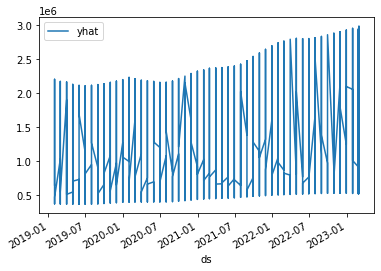

In [122]:
#test
for_loop_forecast.plot(kind='line', x='ds', y='yhat')